## Import Library

In [298]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from imblearn.over_sampling import SMOTE

from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

## Load dataset

In [ ]:
df = pd.read_csv('WA_FnUseC_TelcoCustomerChurn.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## EDA

In [301]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [302]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', None).astype(float)

In [303]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


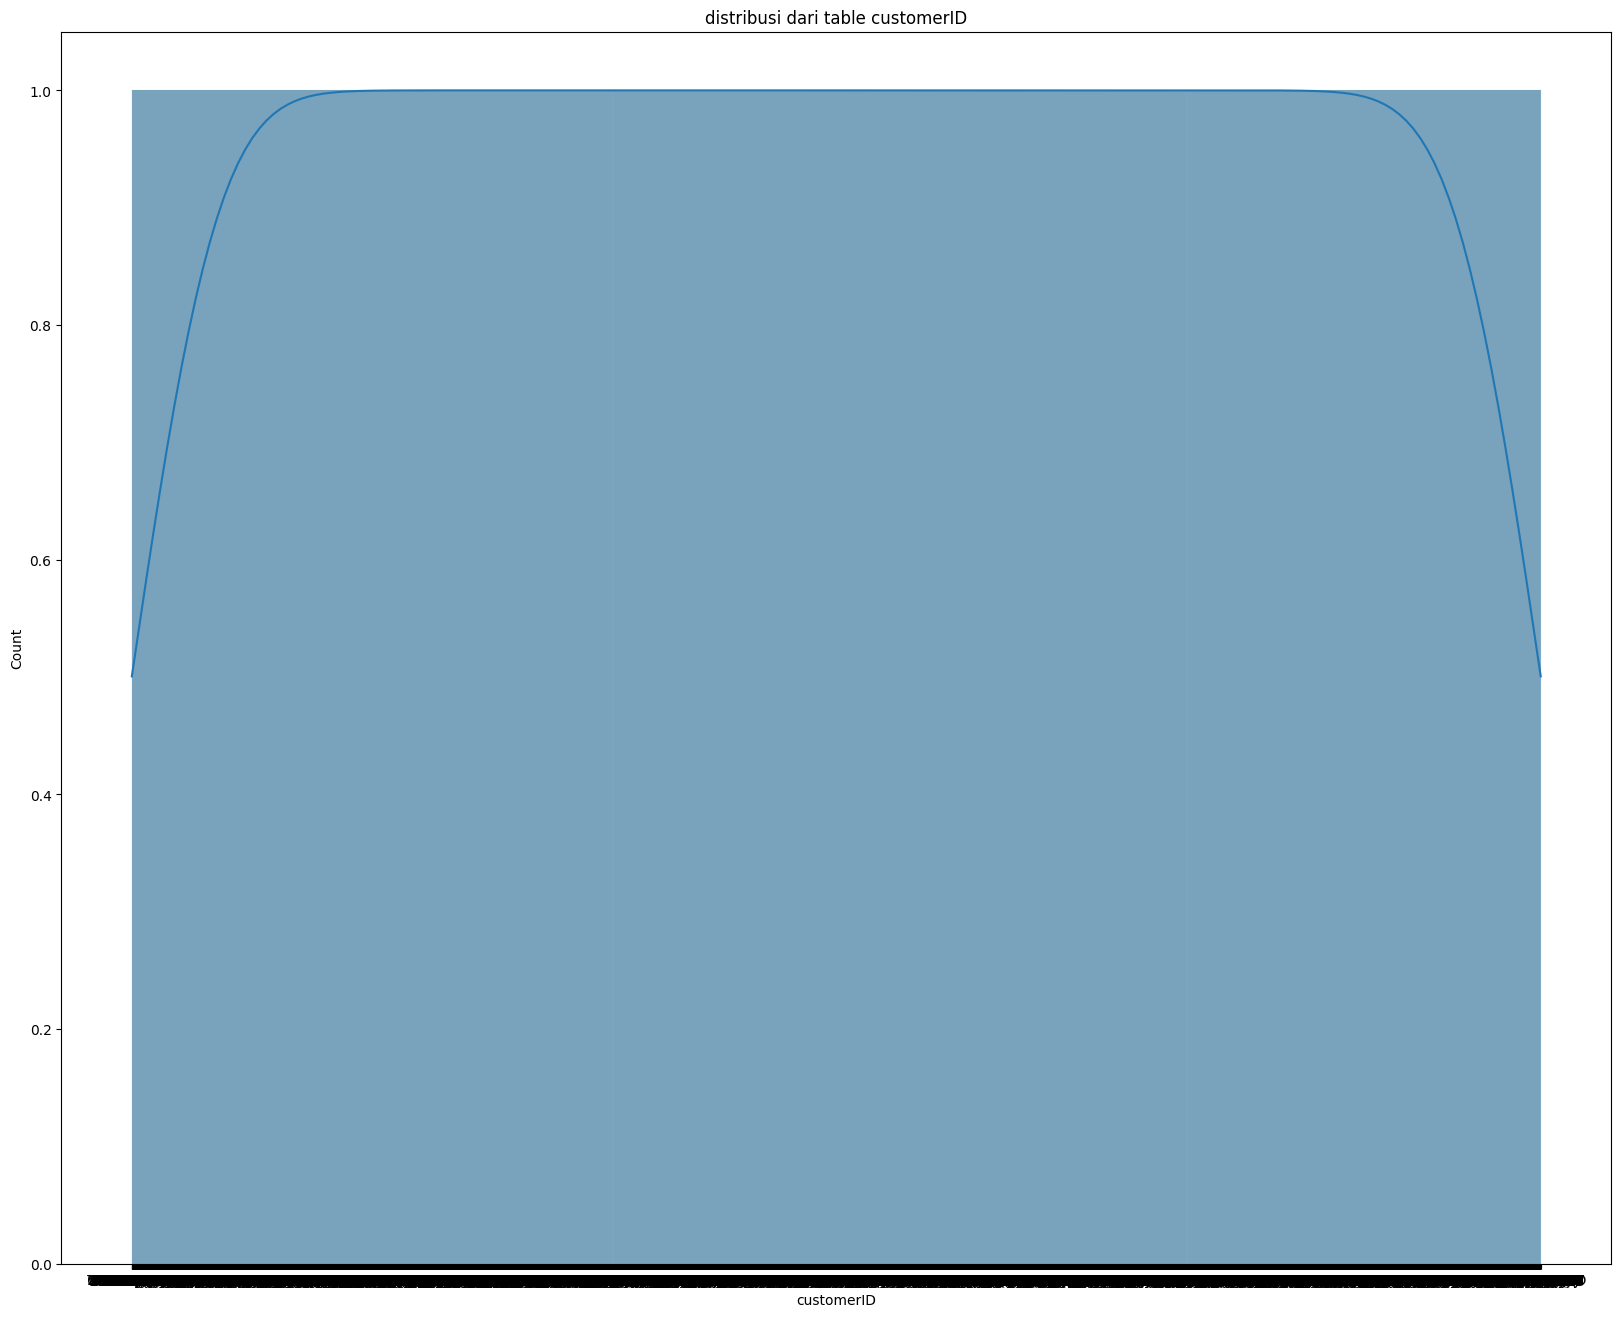

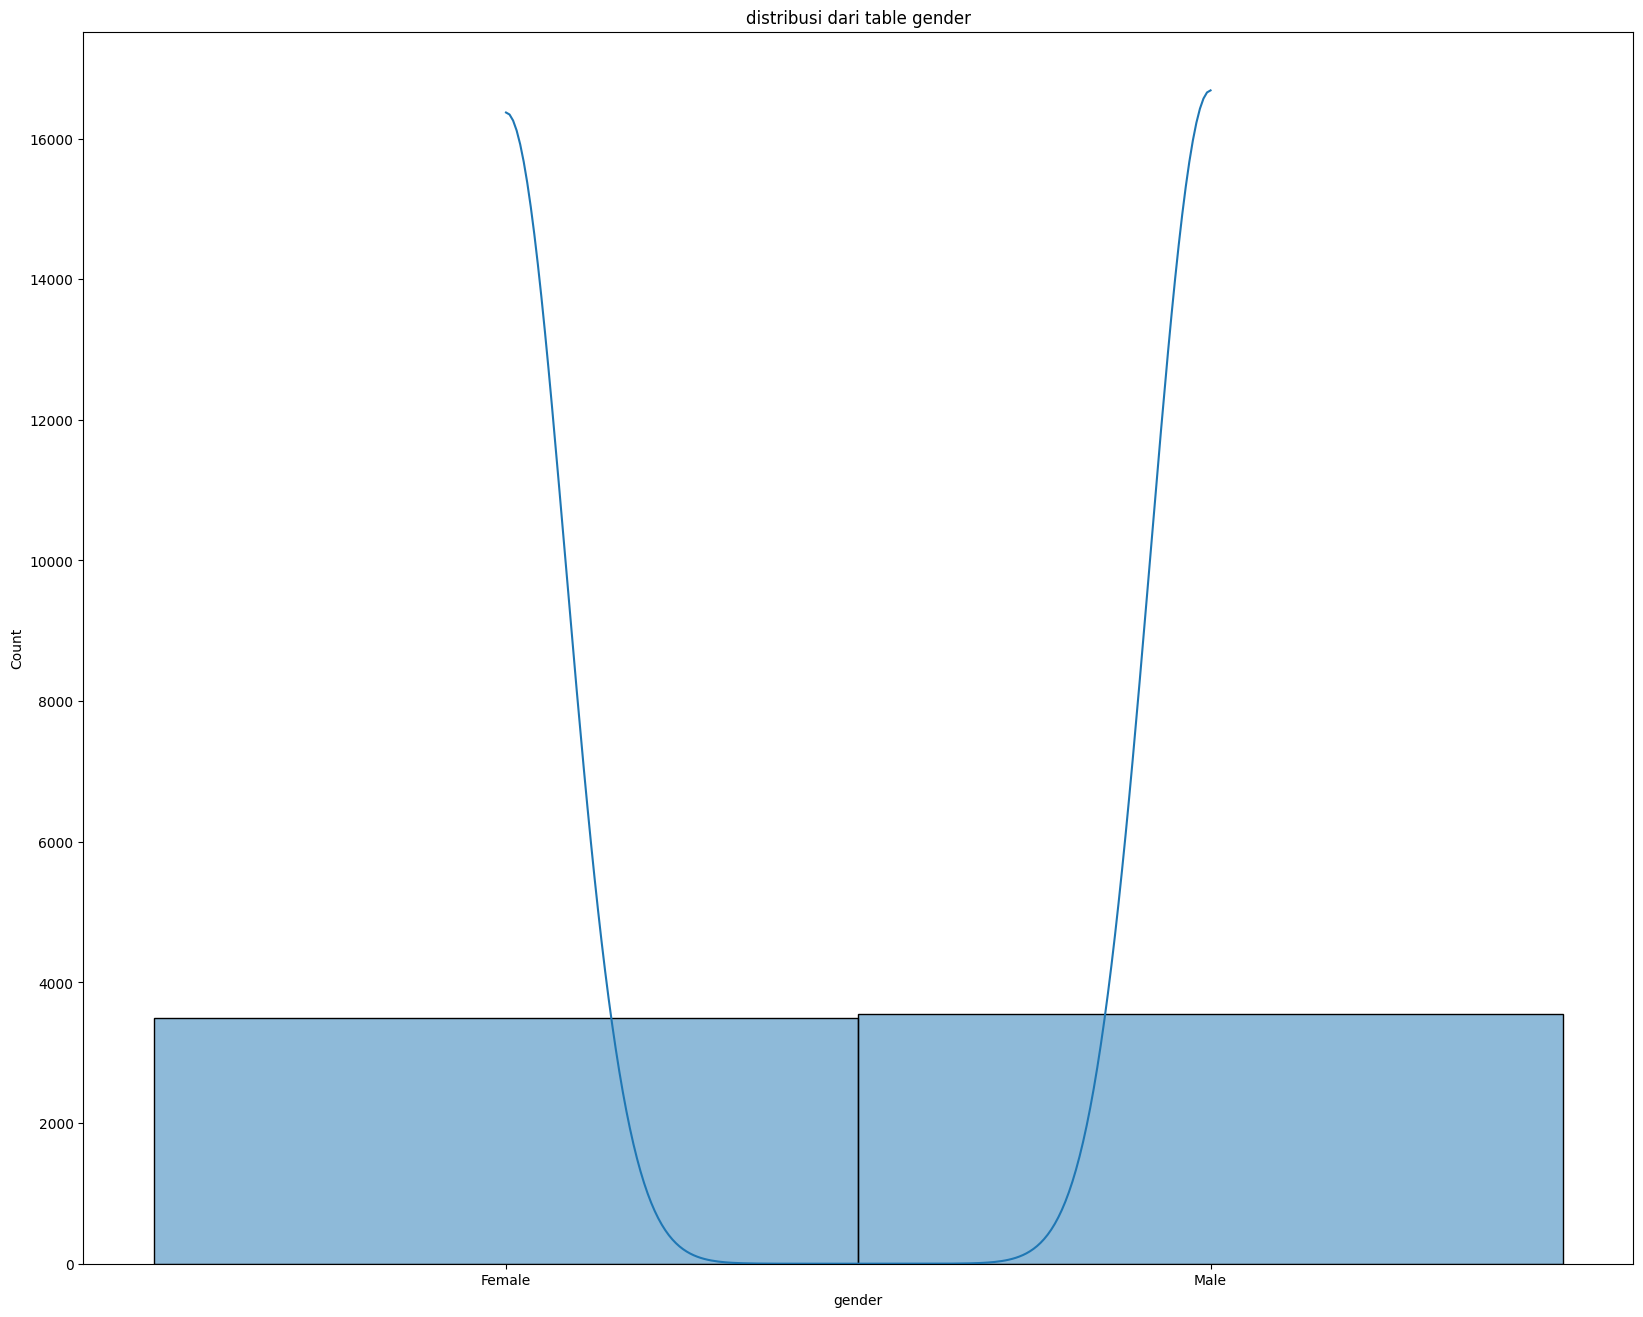

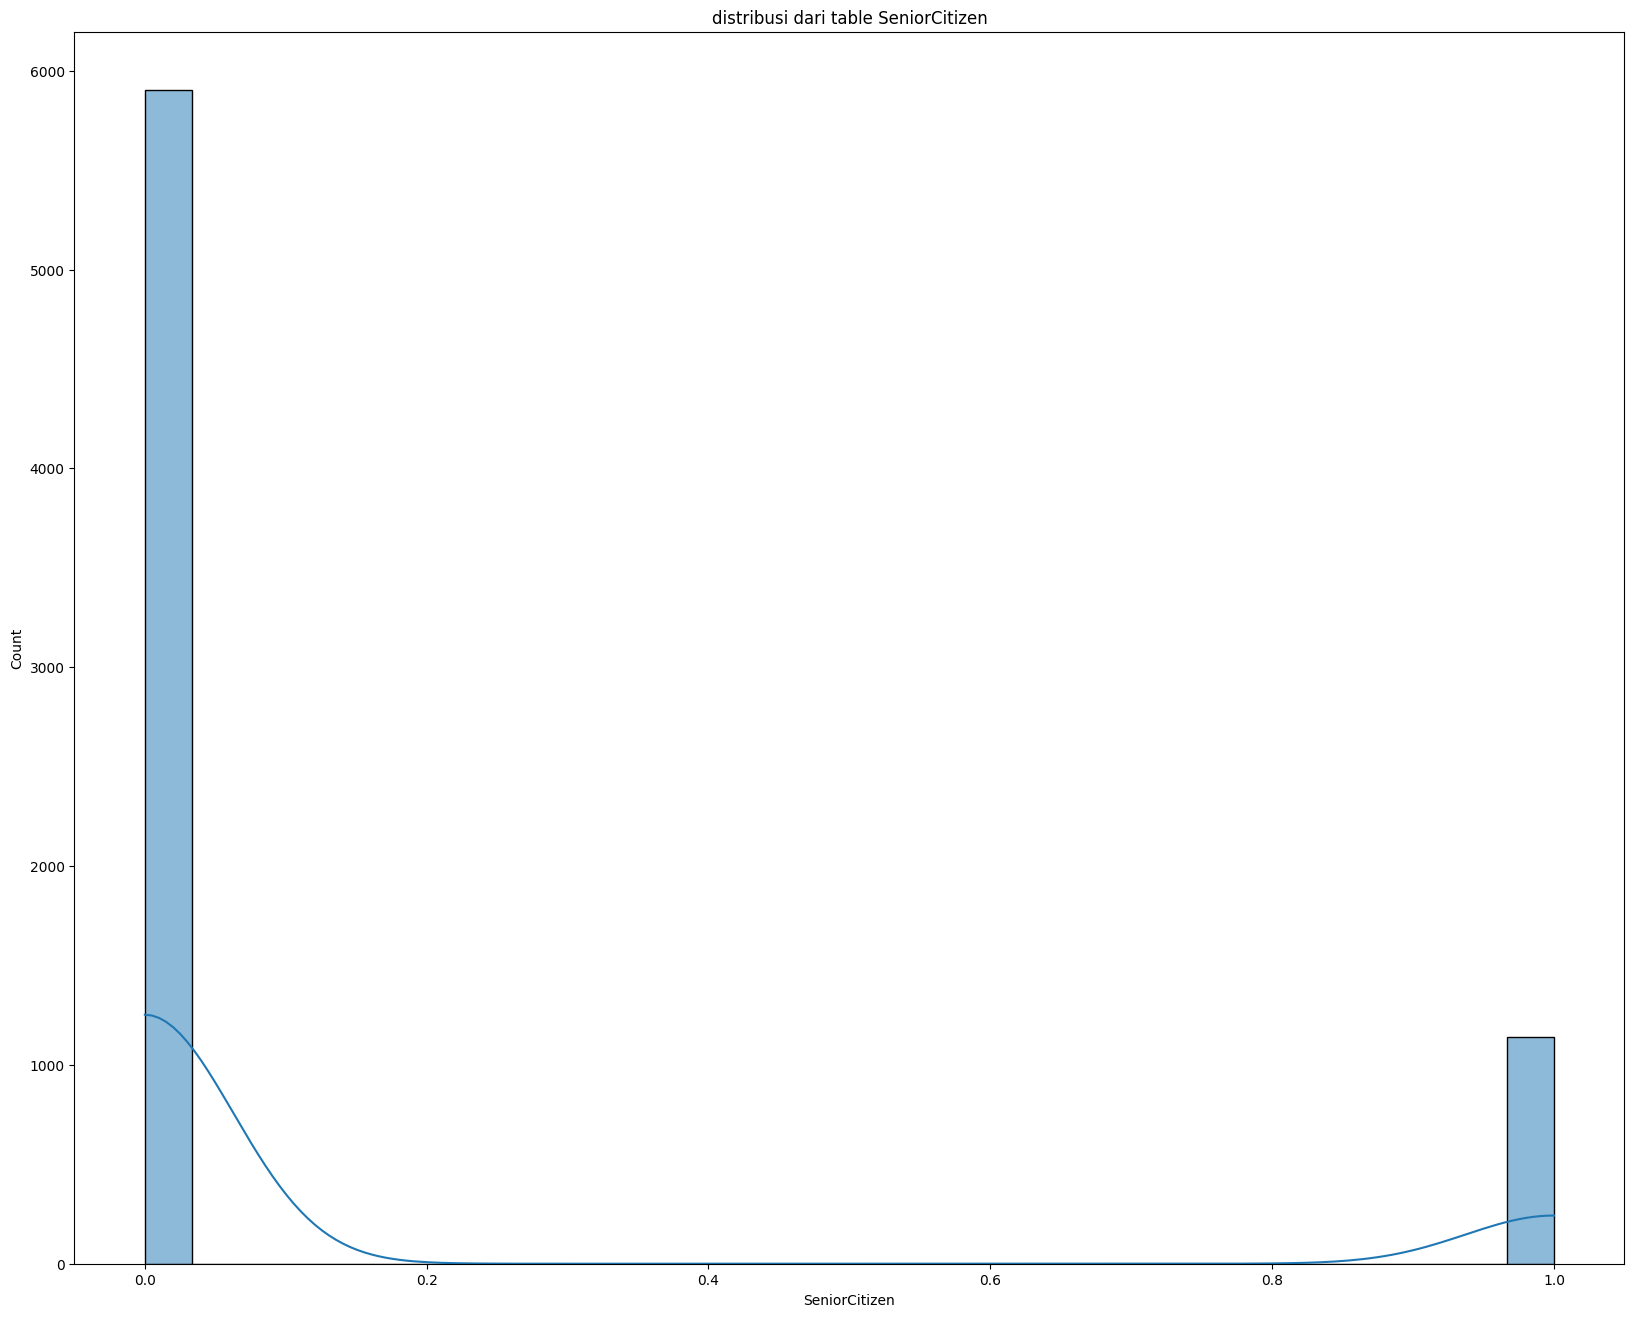

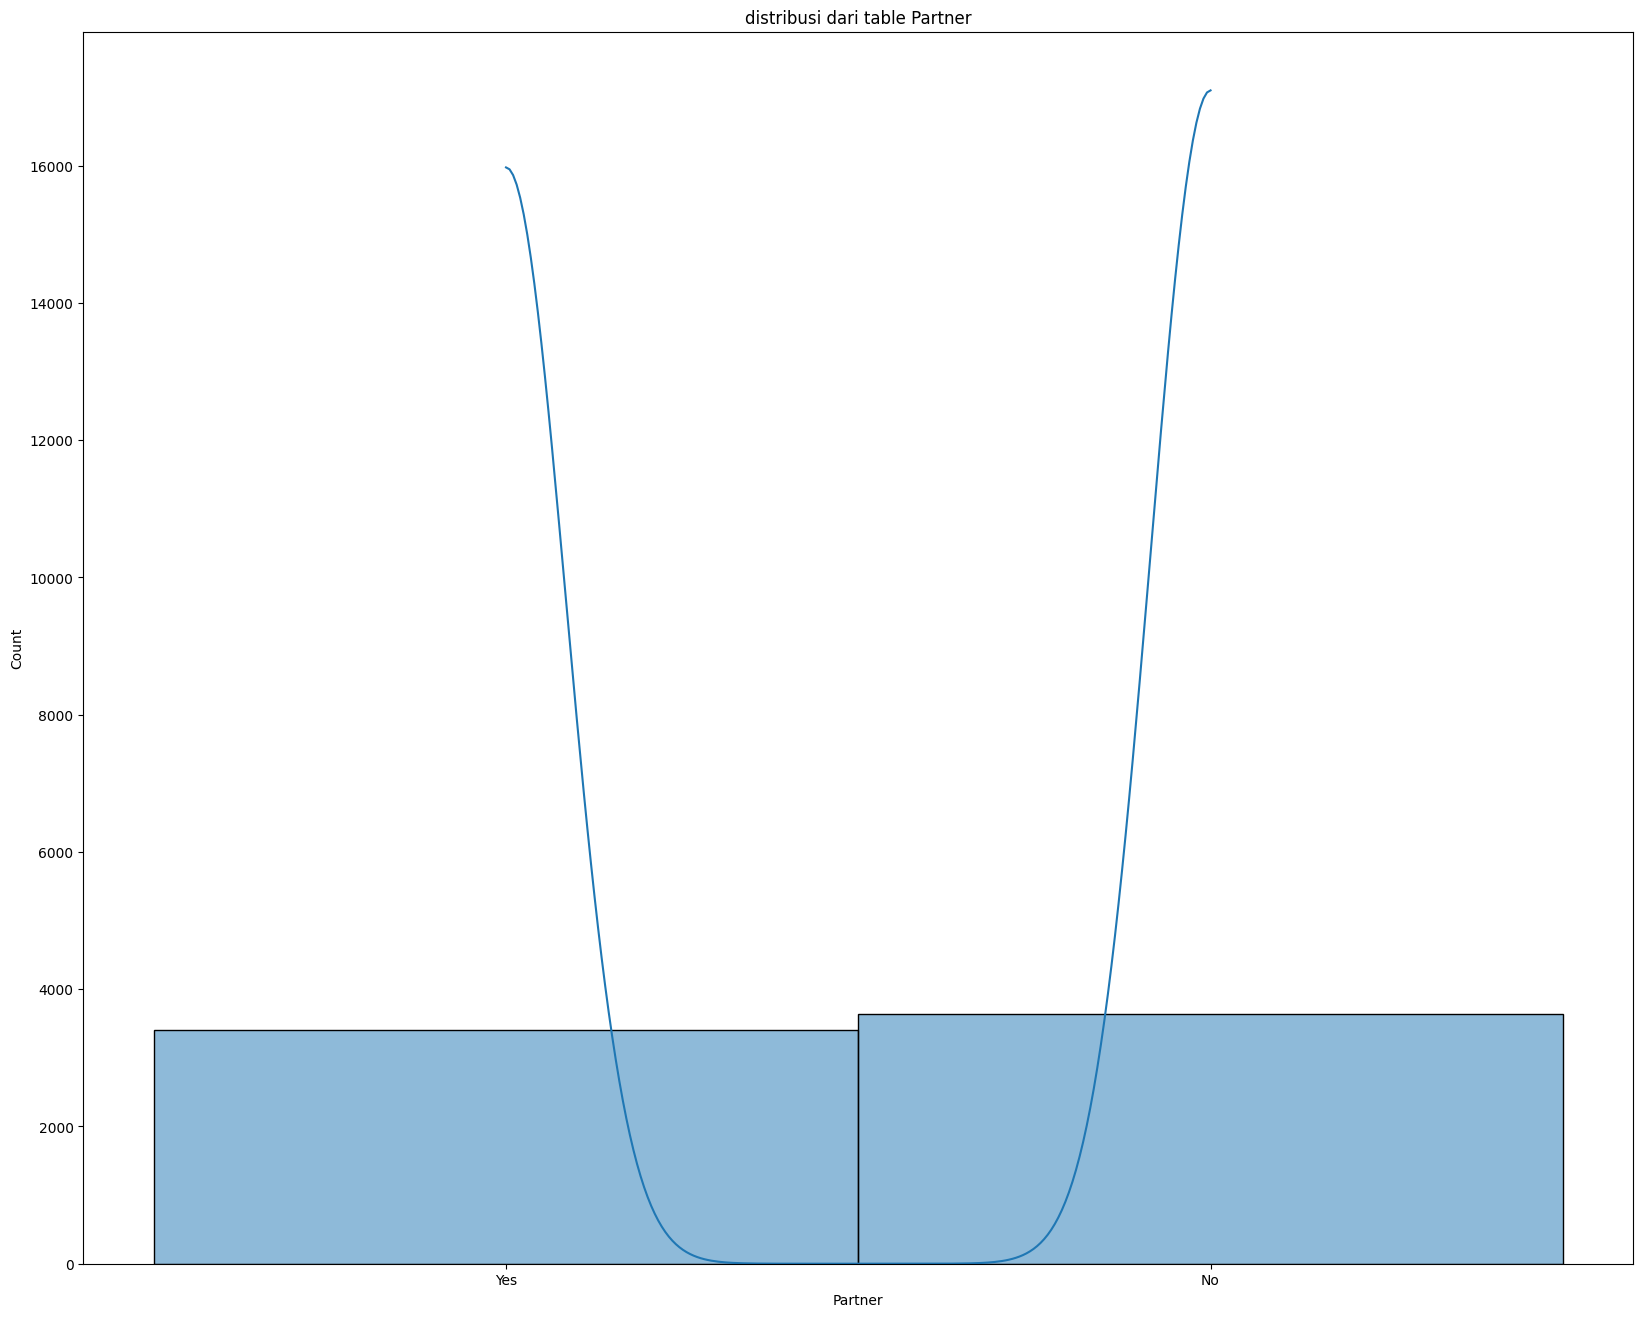

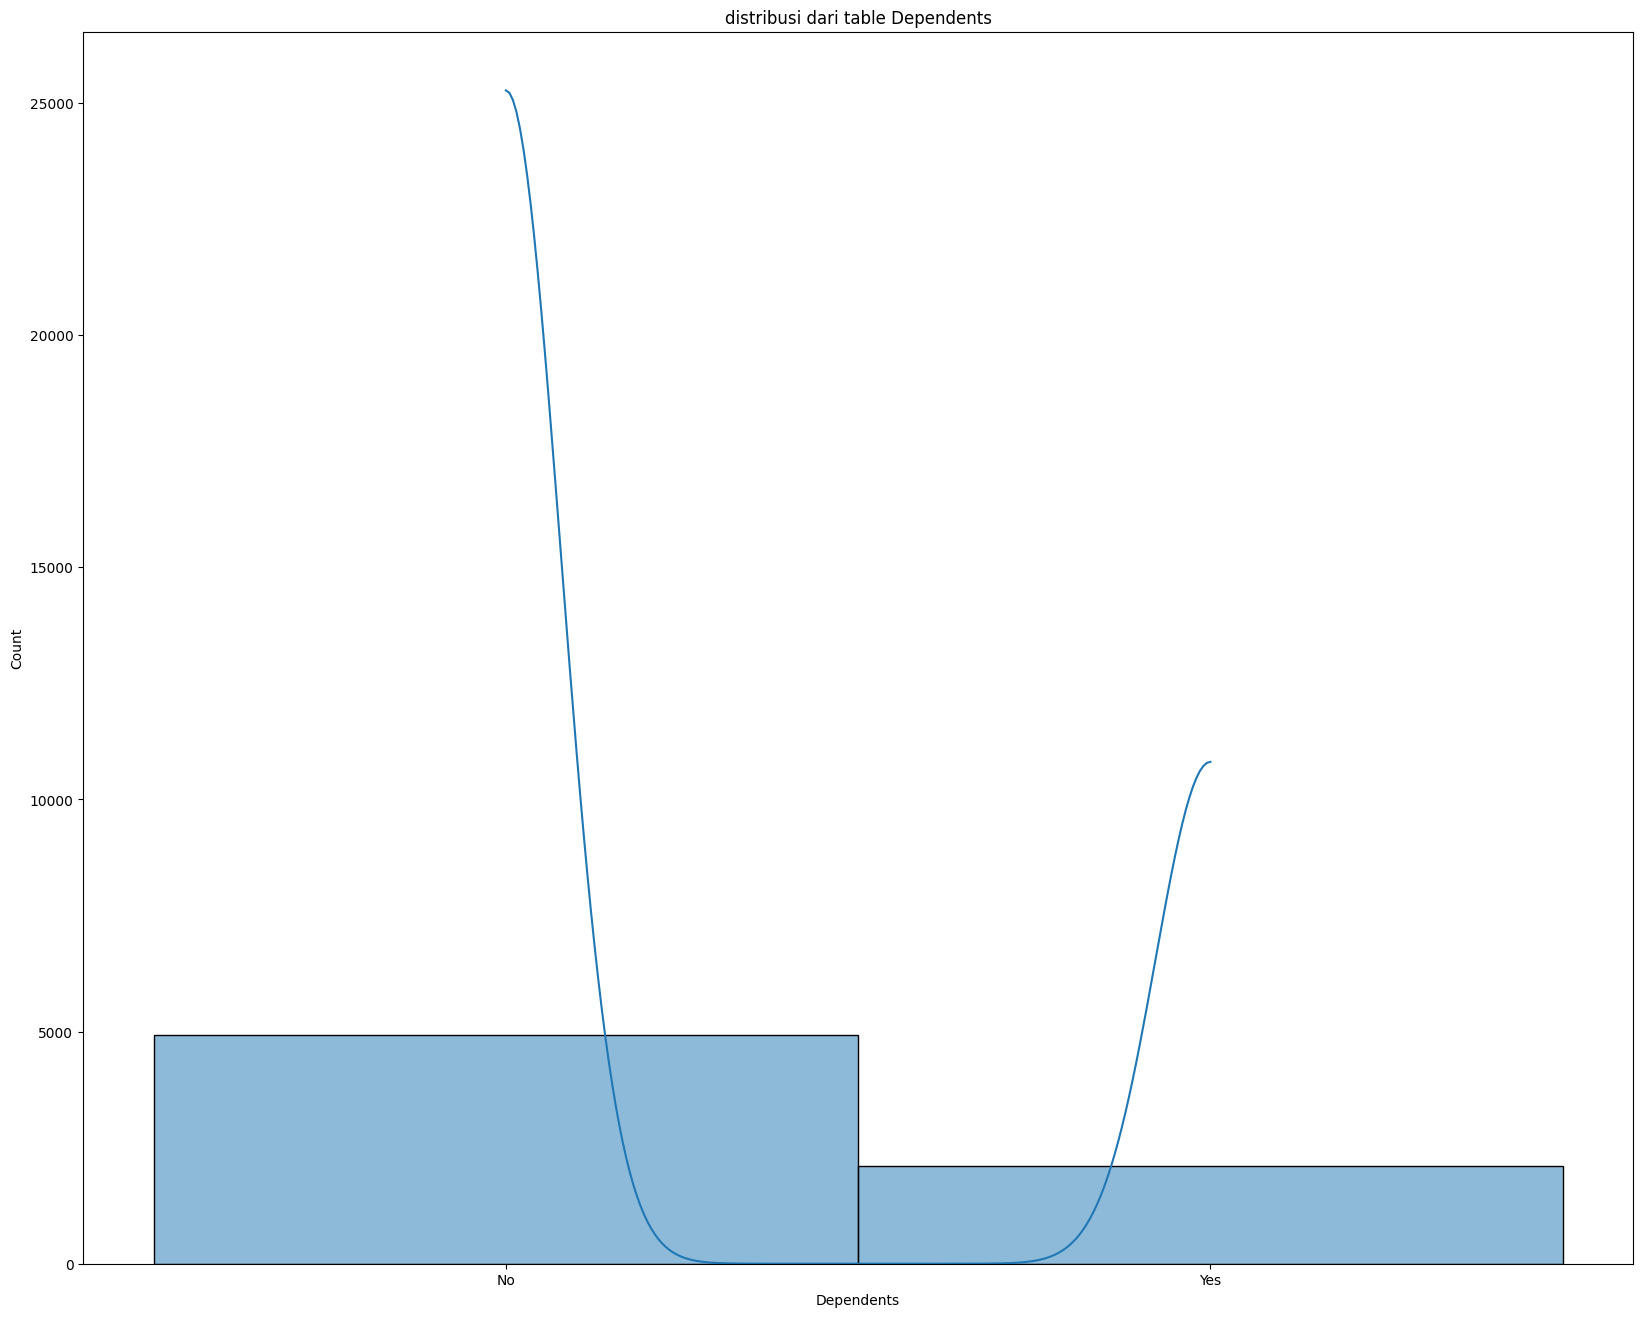

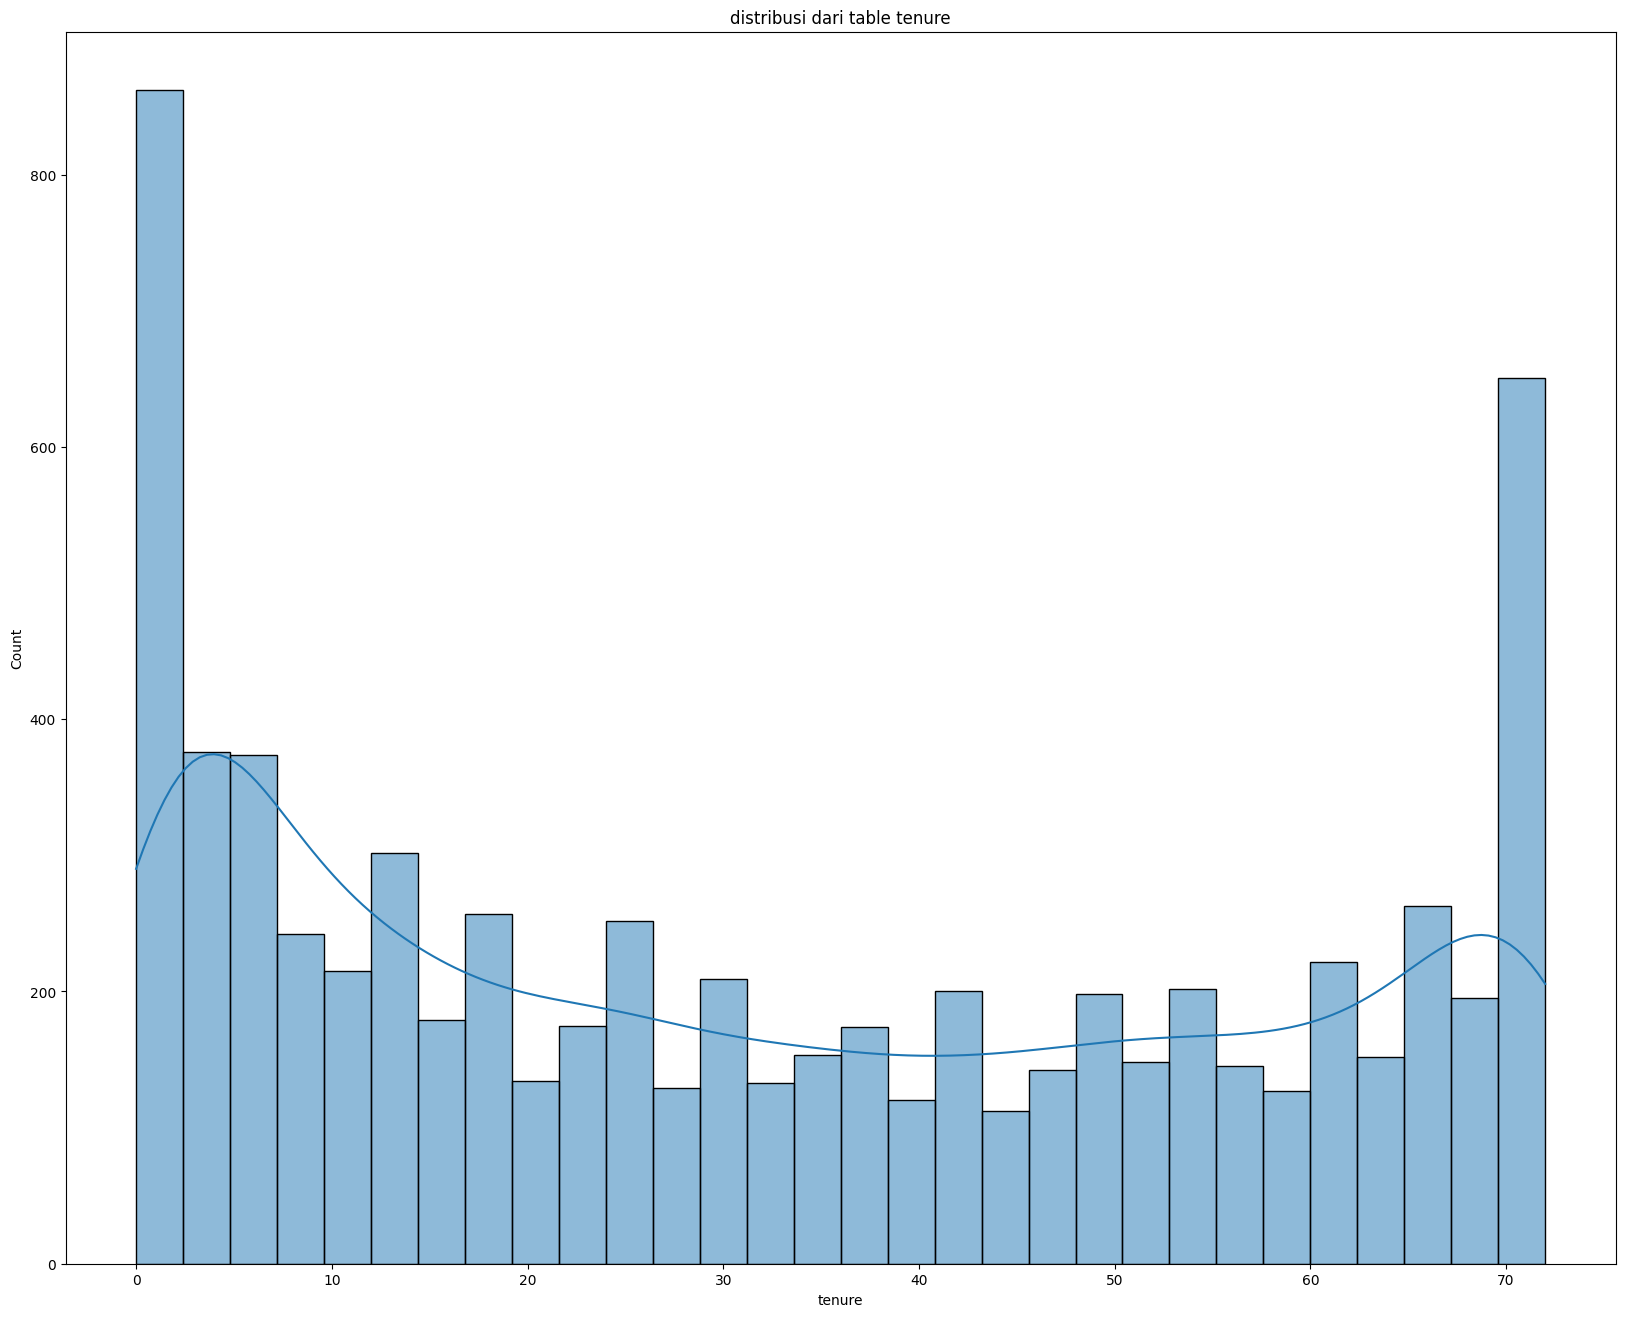

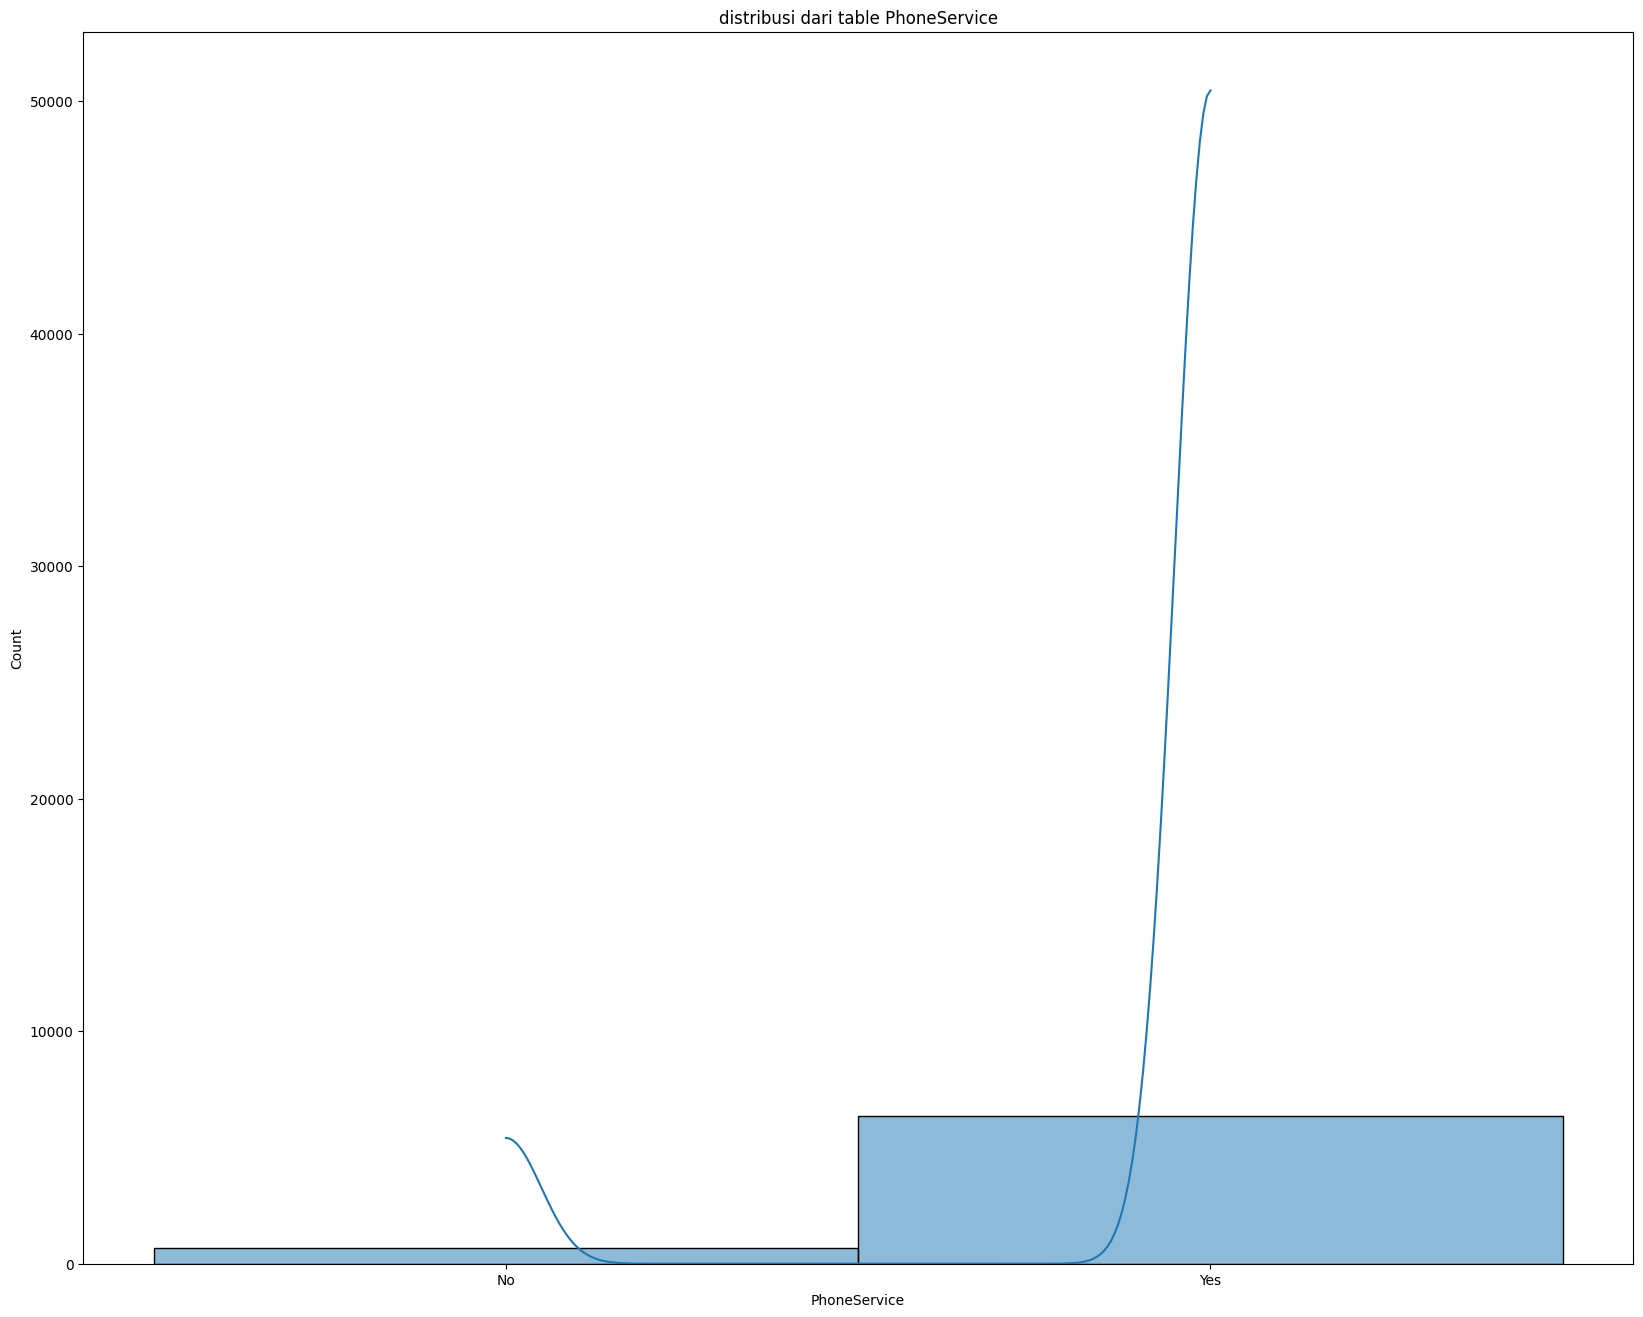

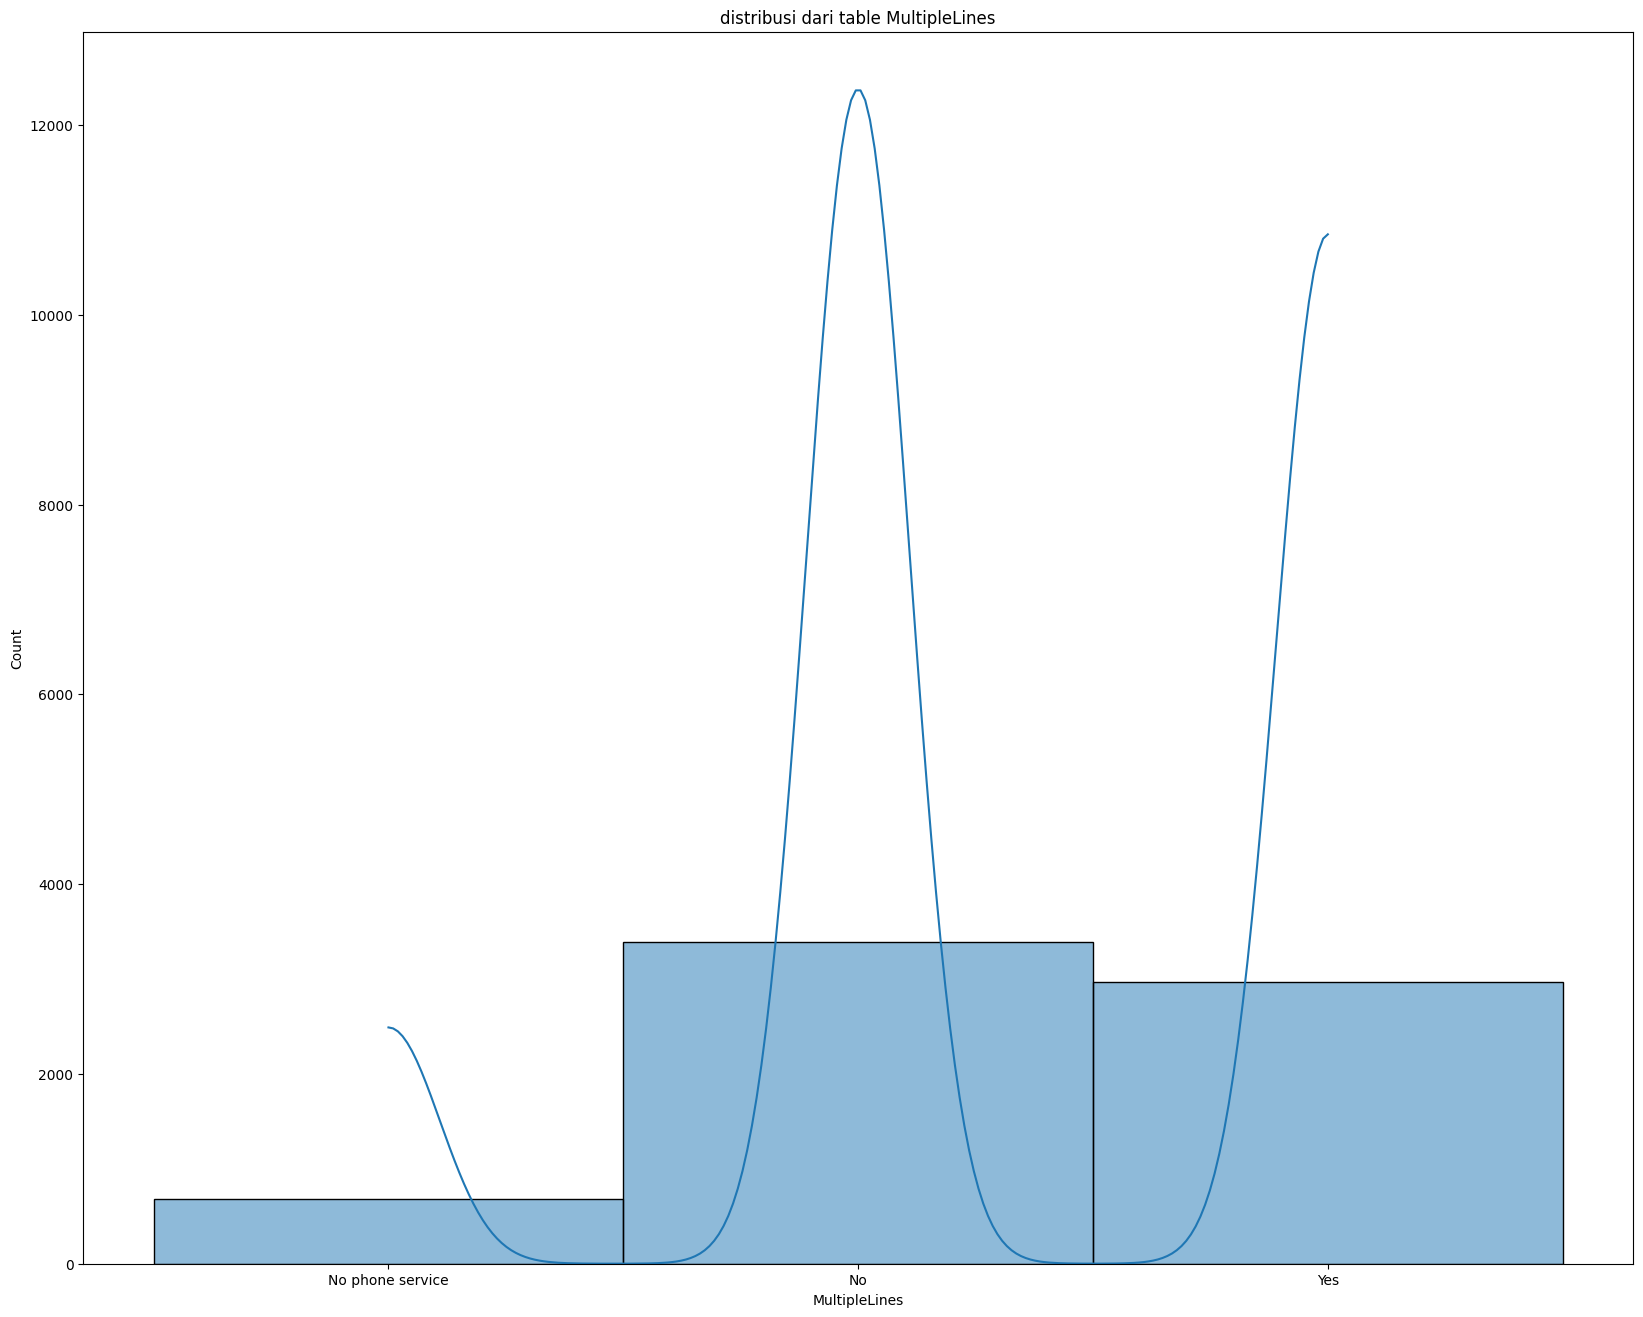

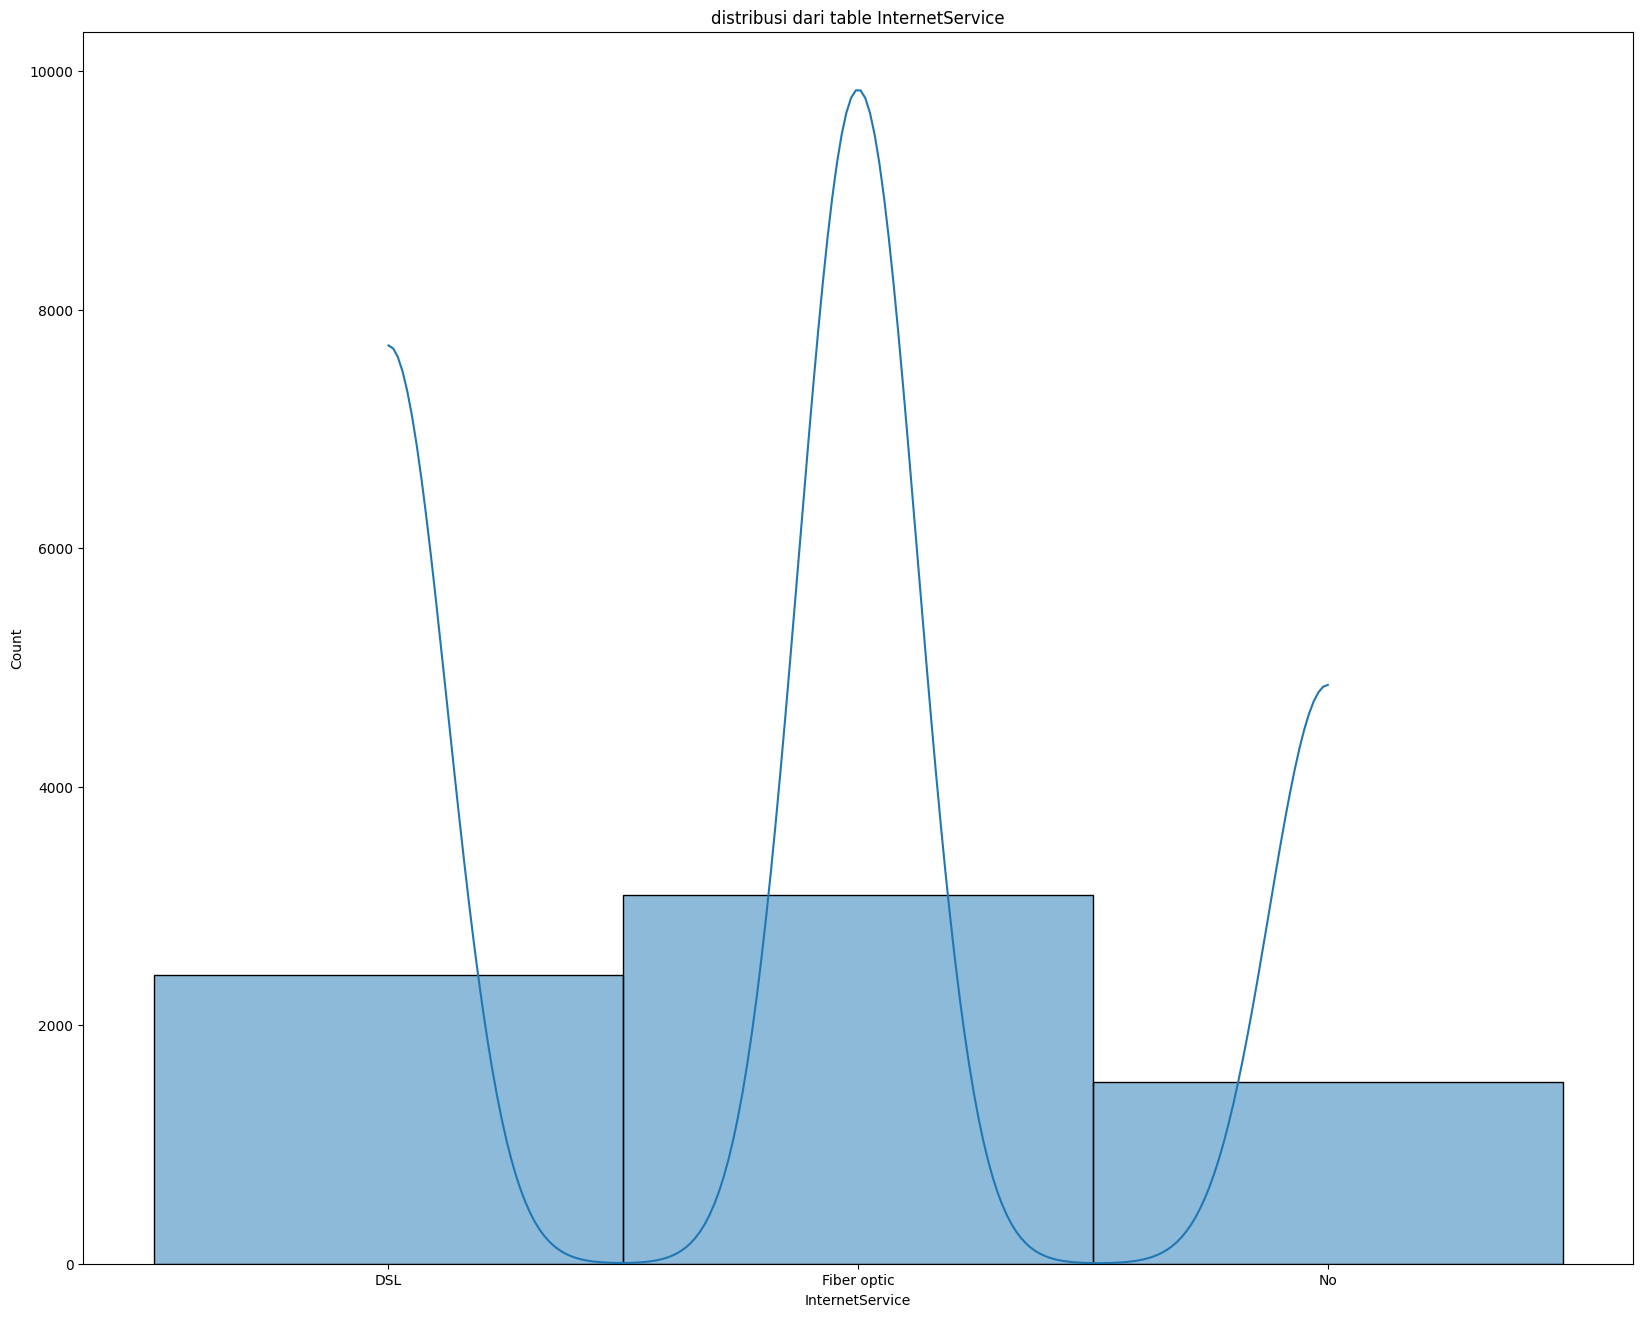

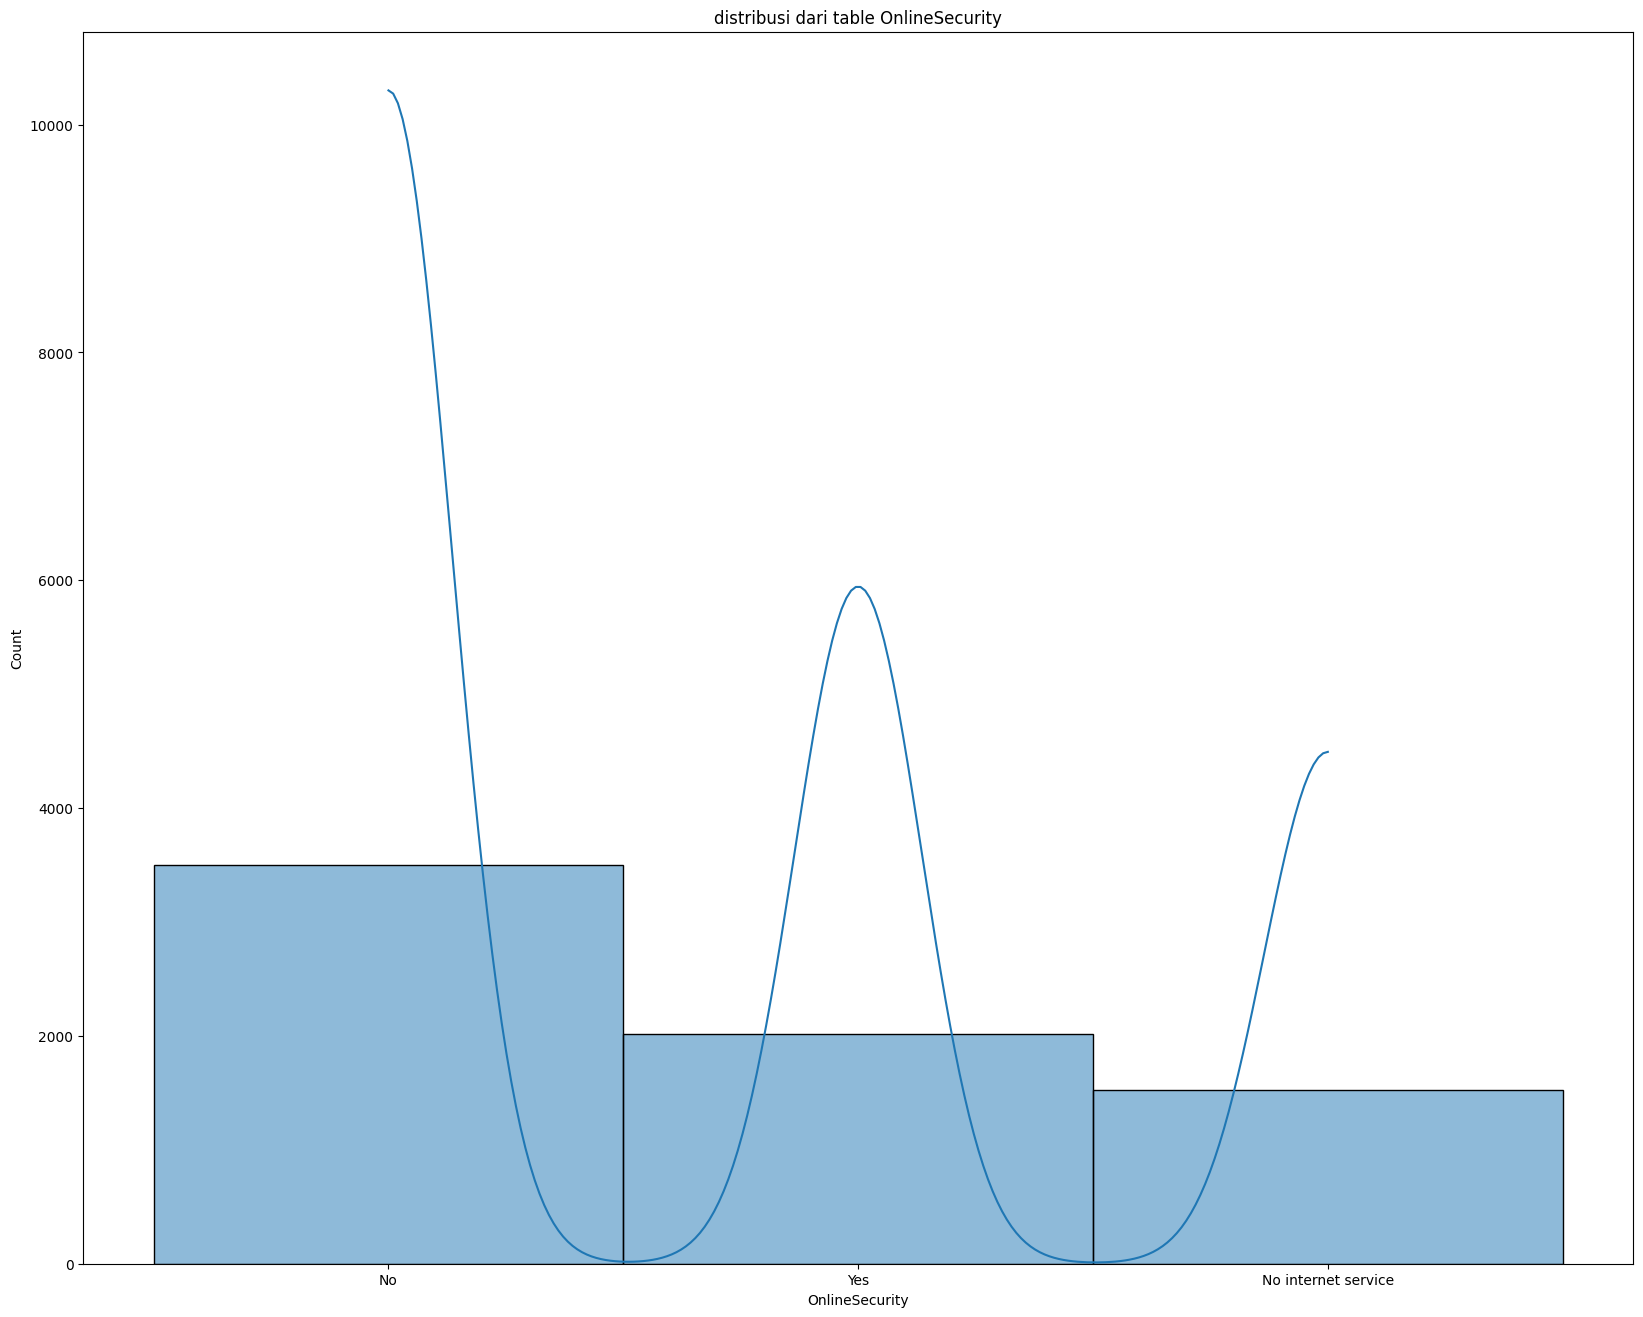

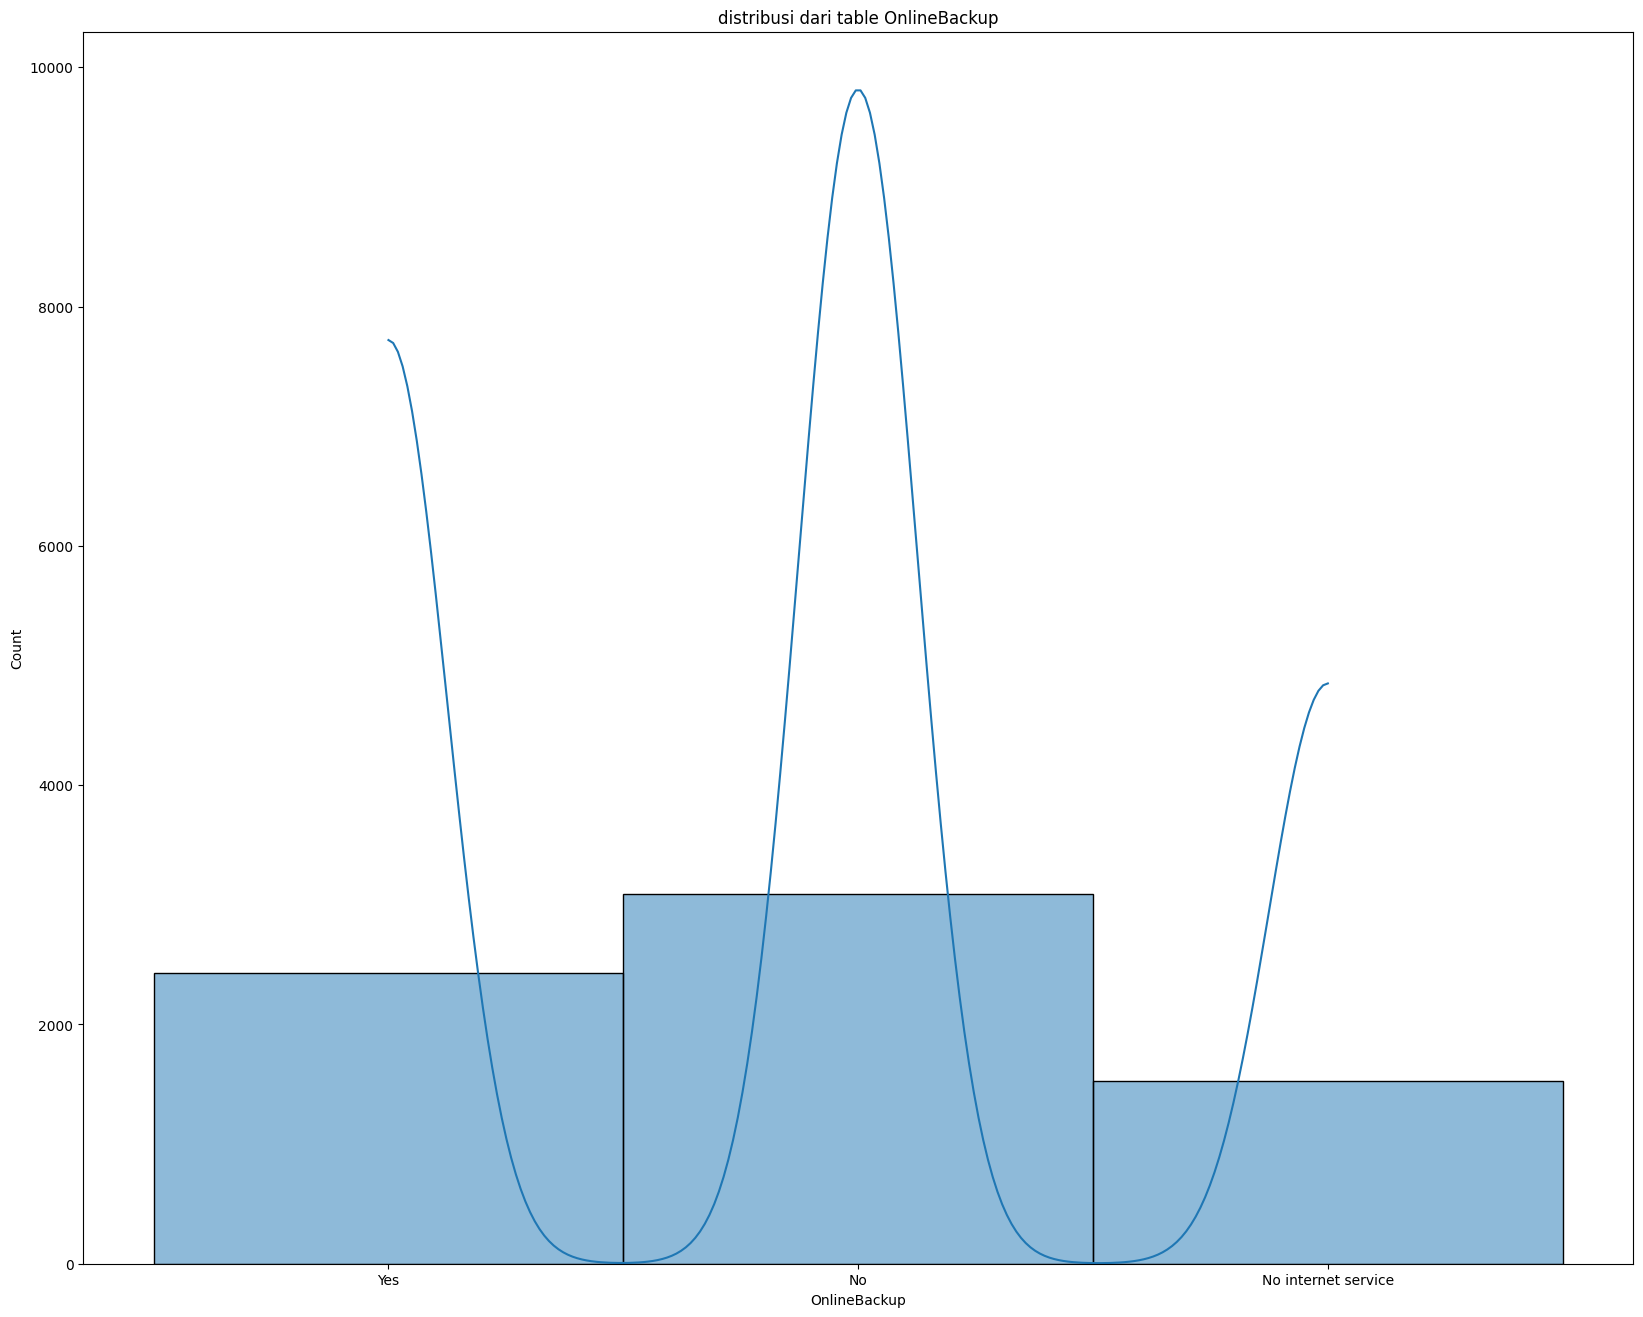

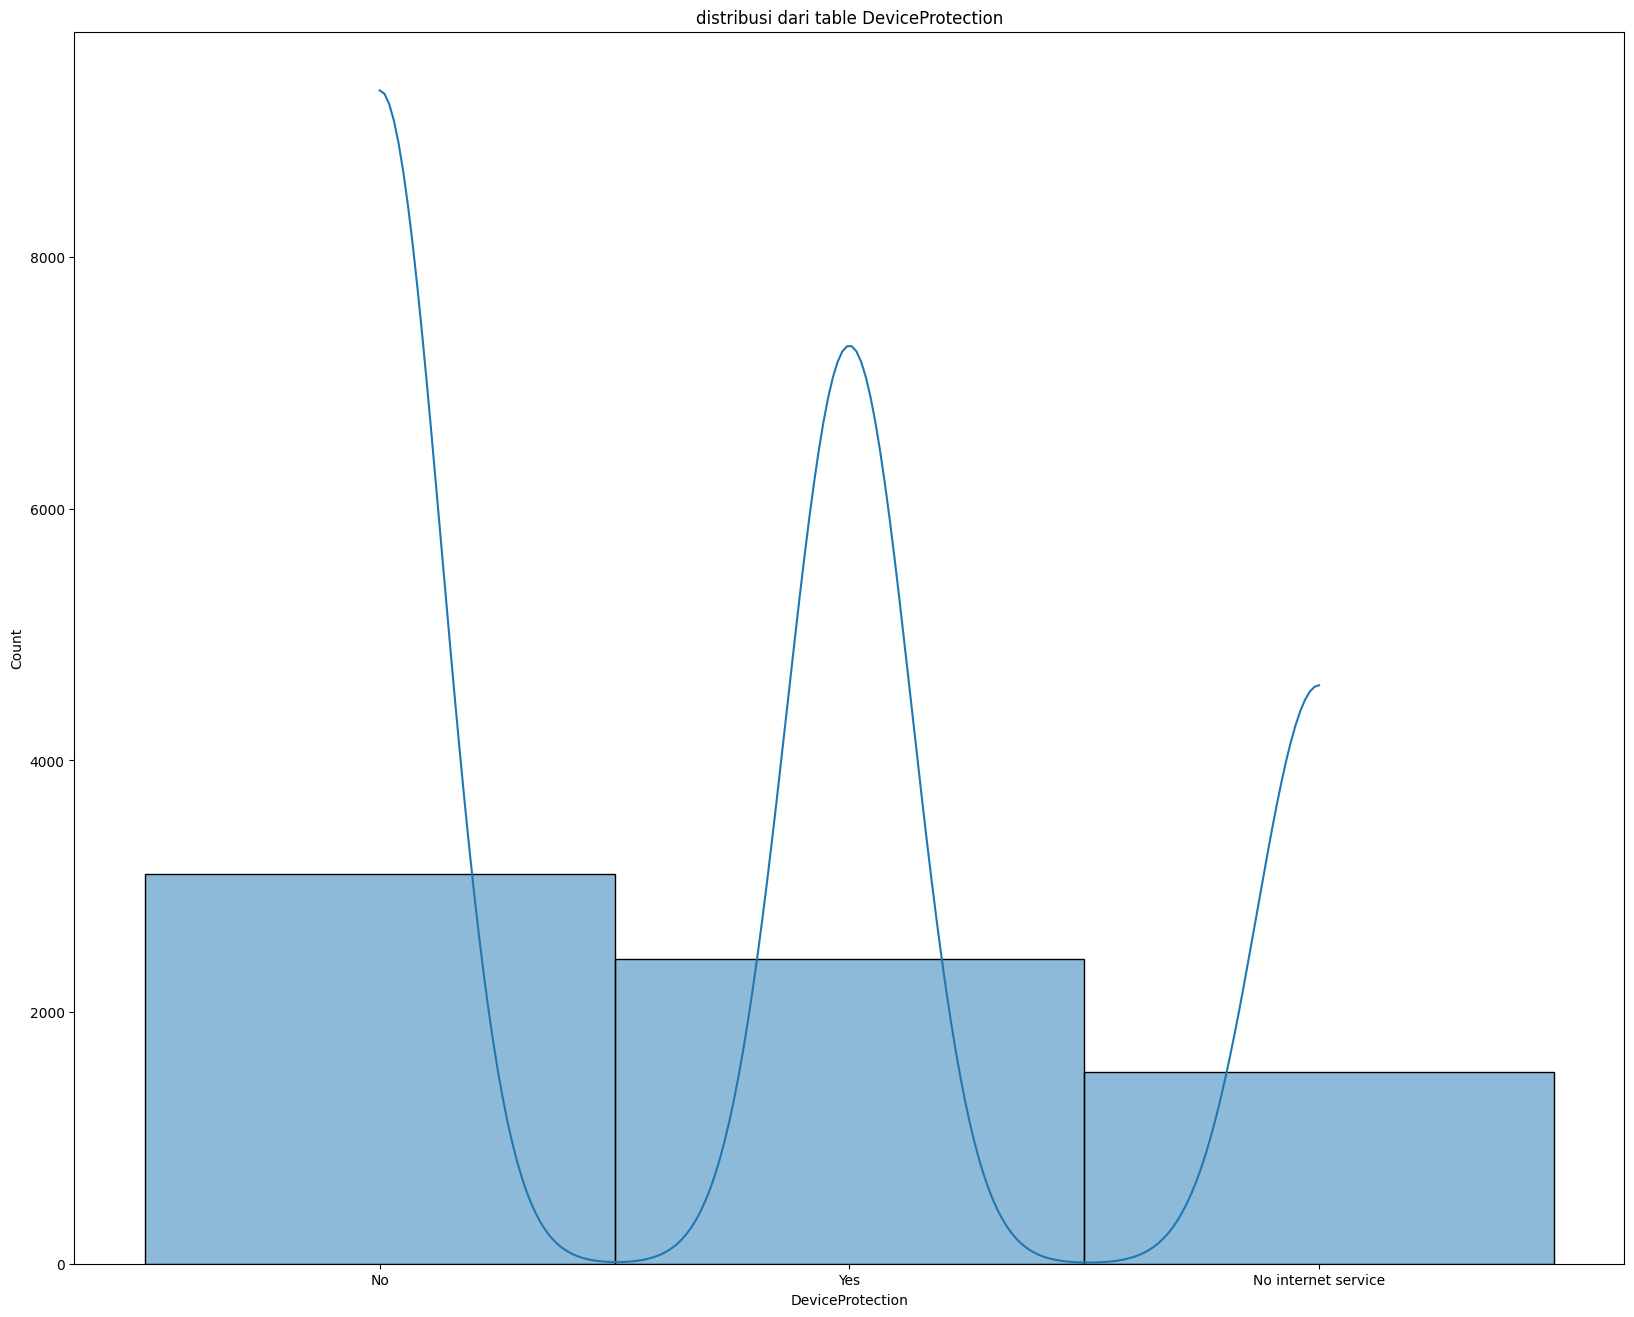

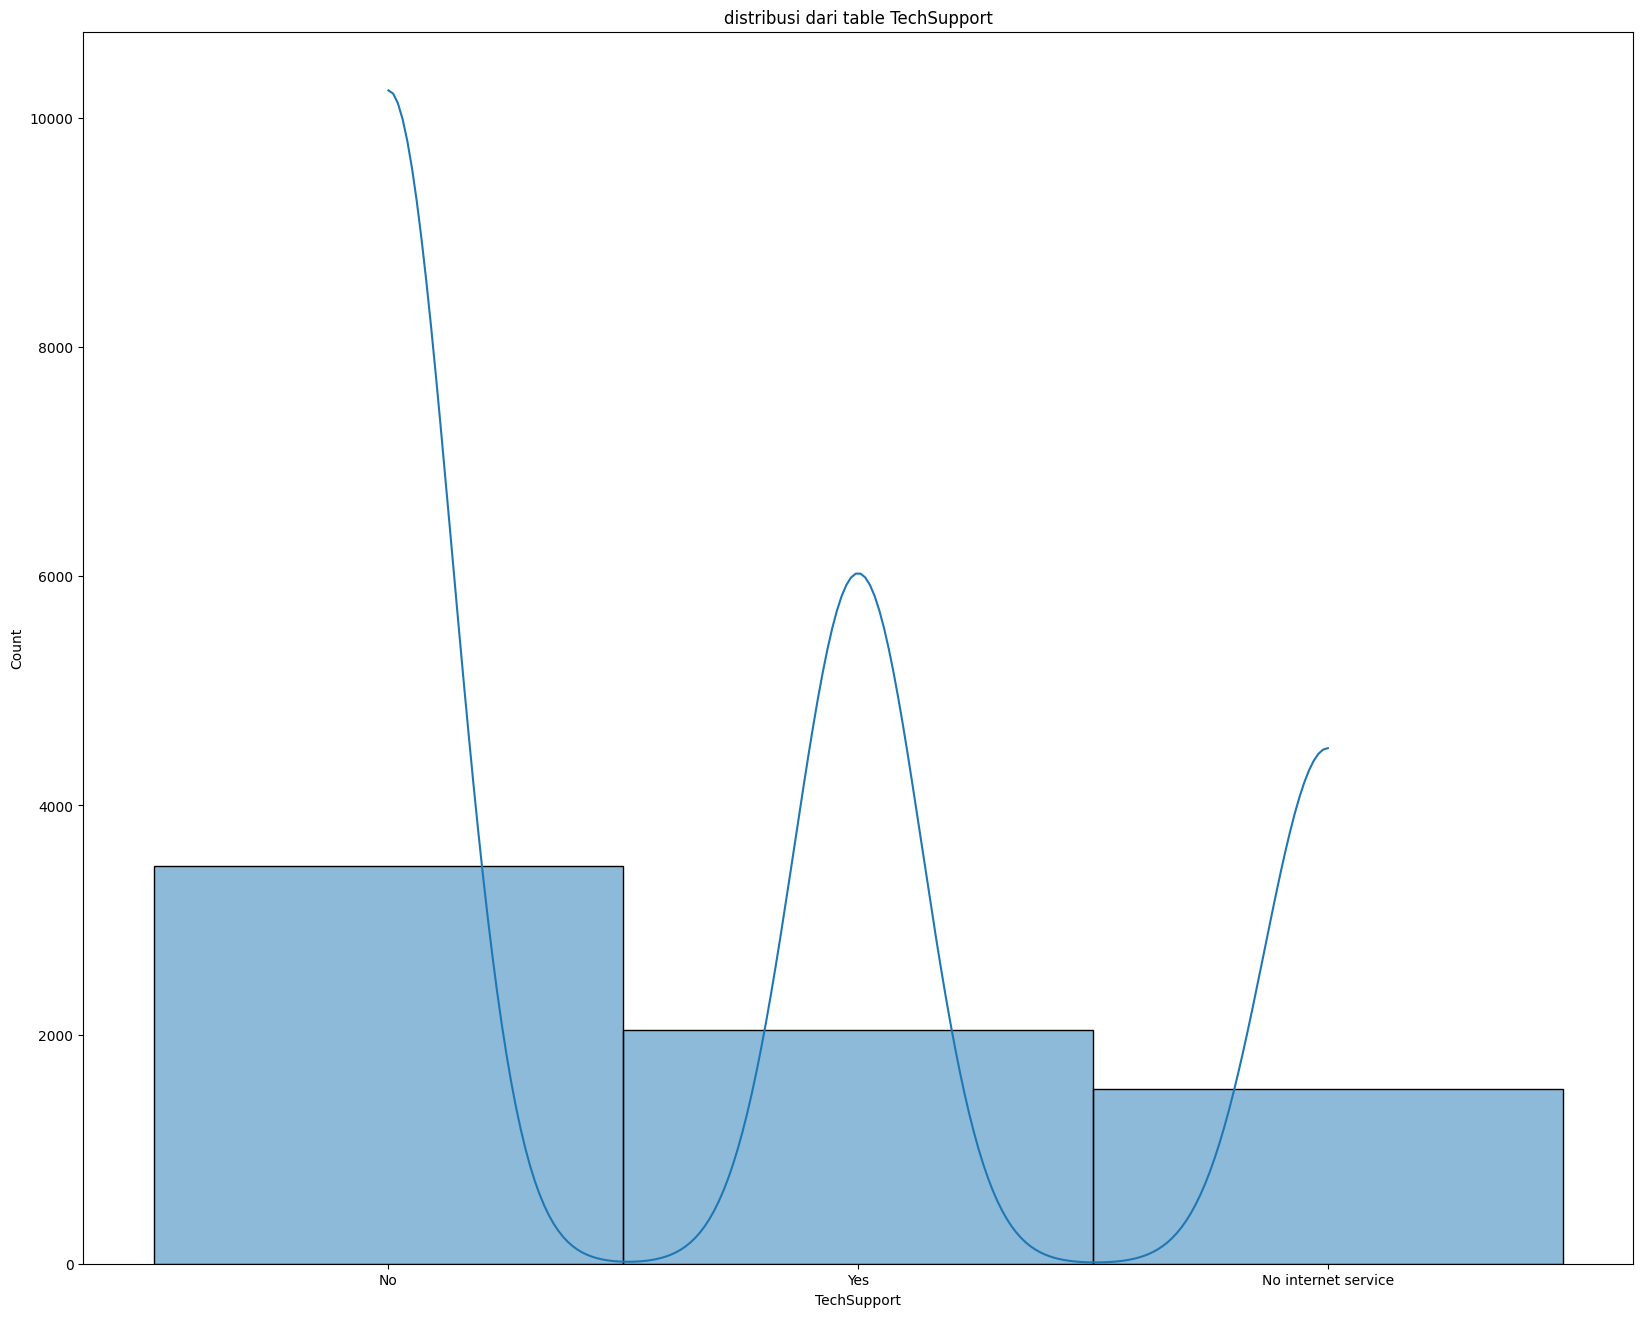

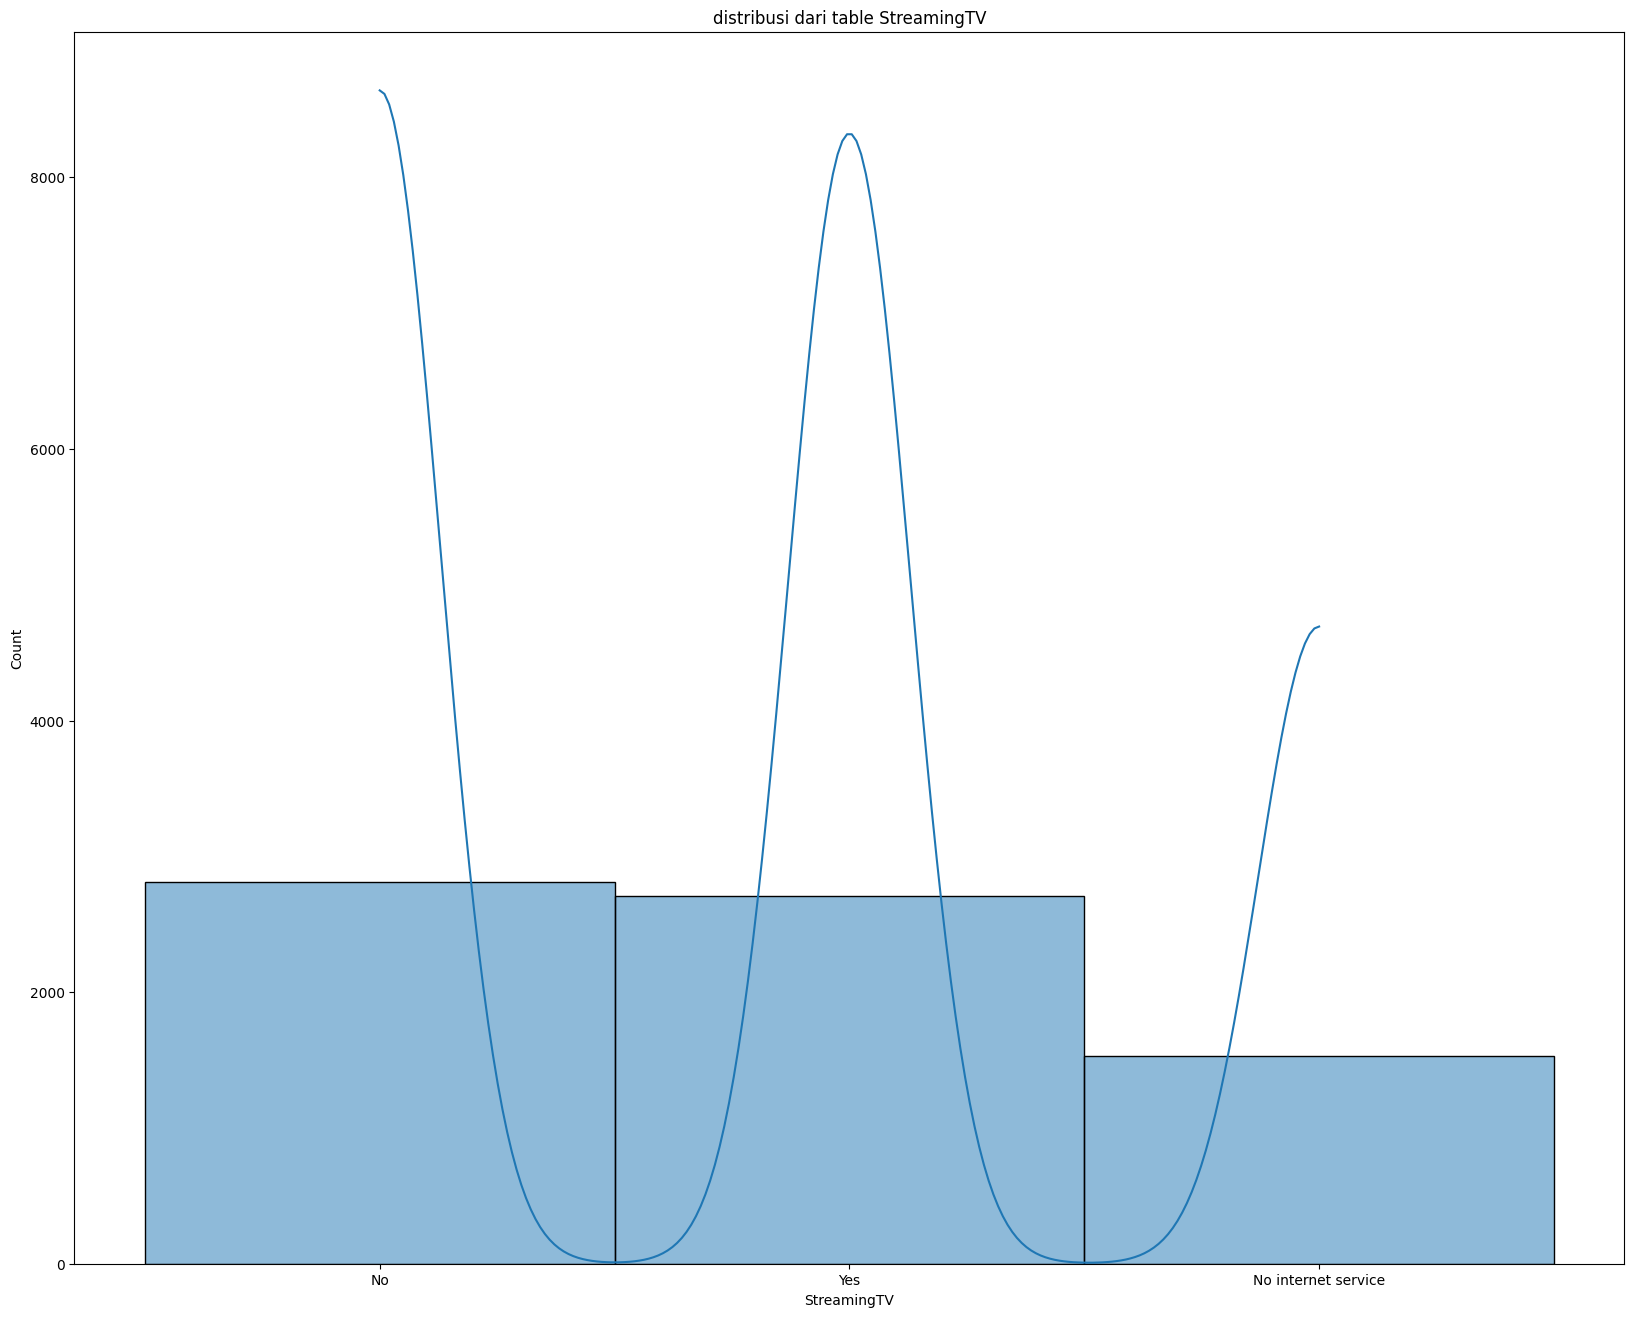

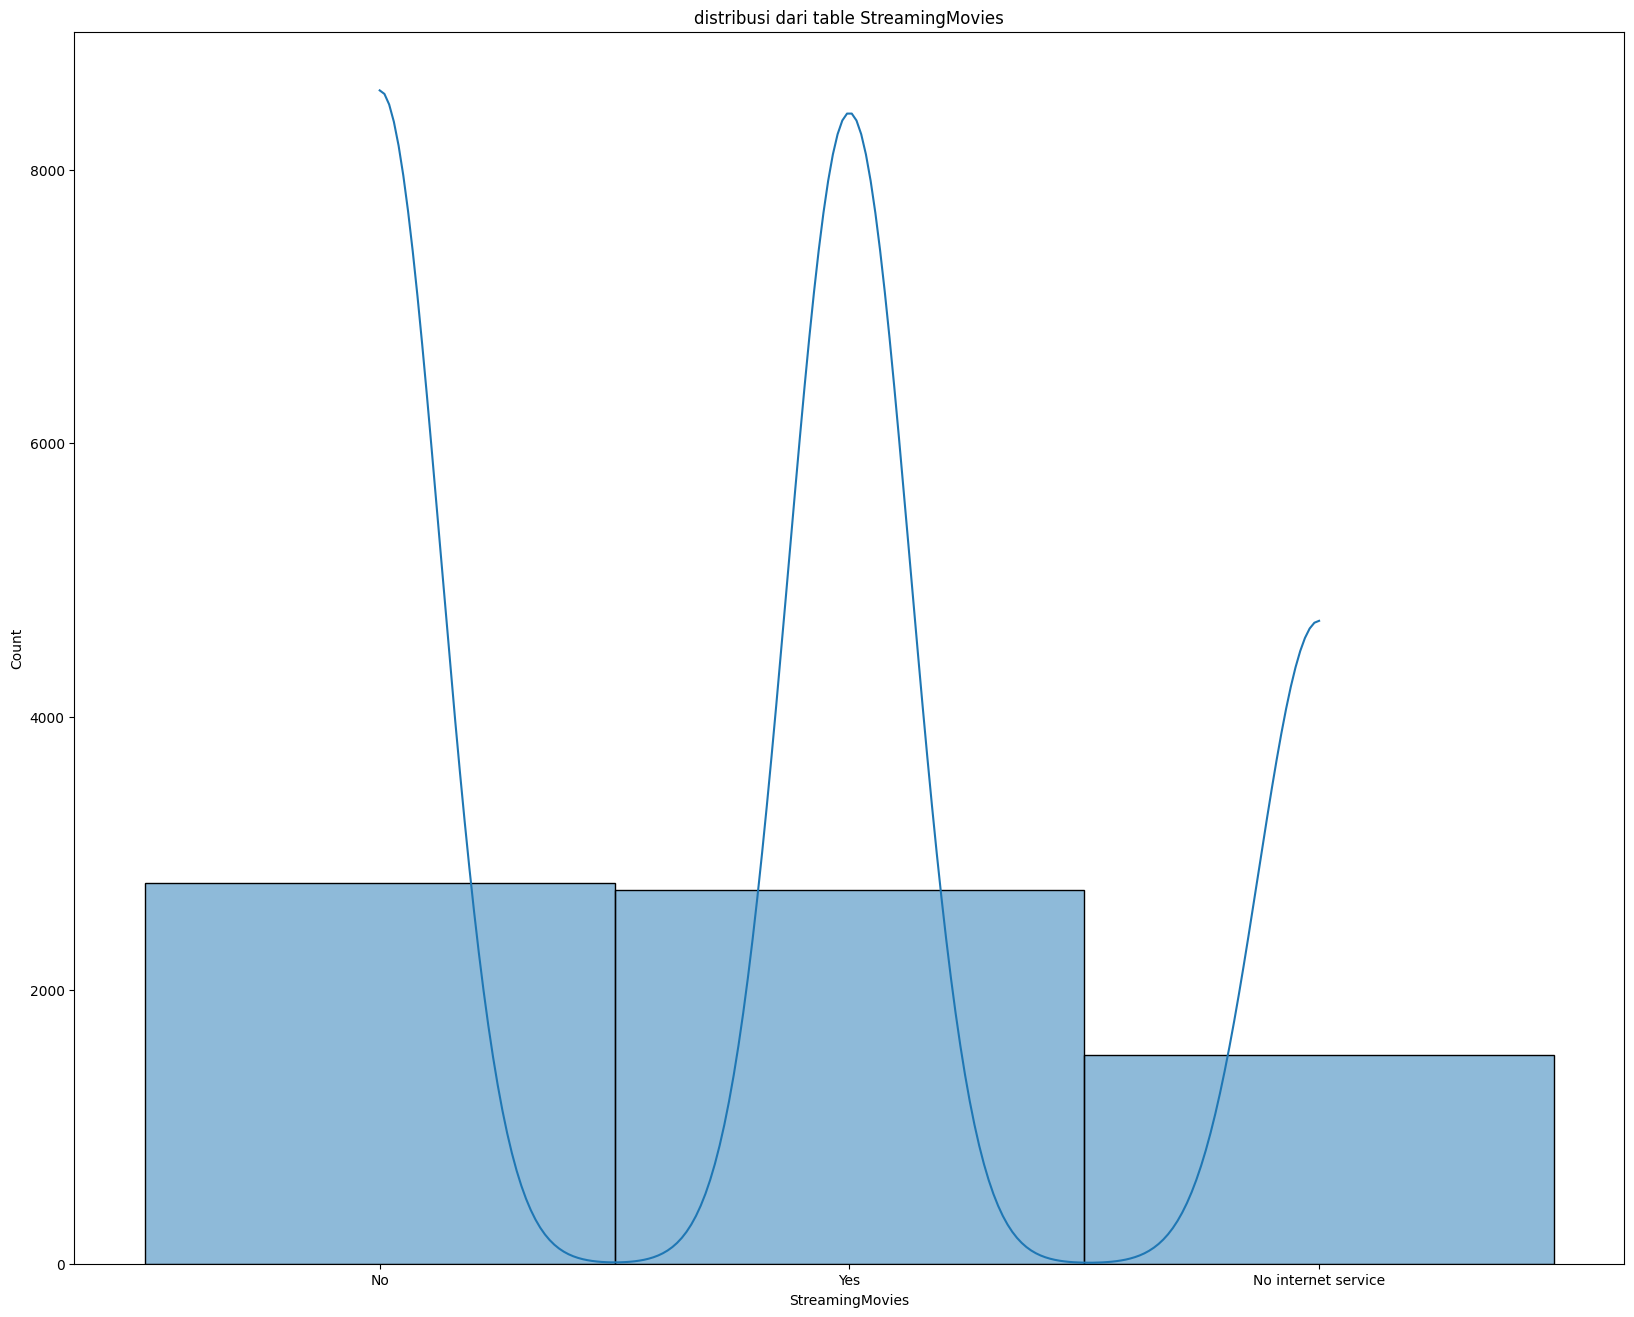

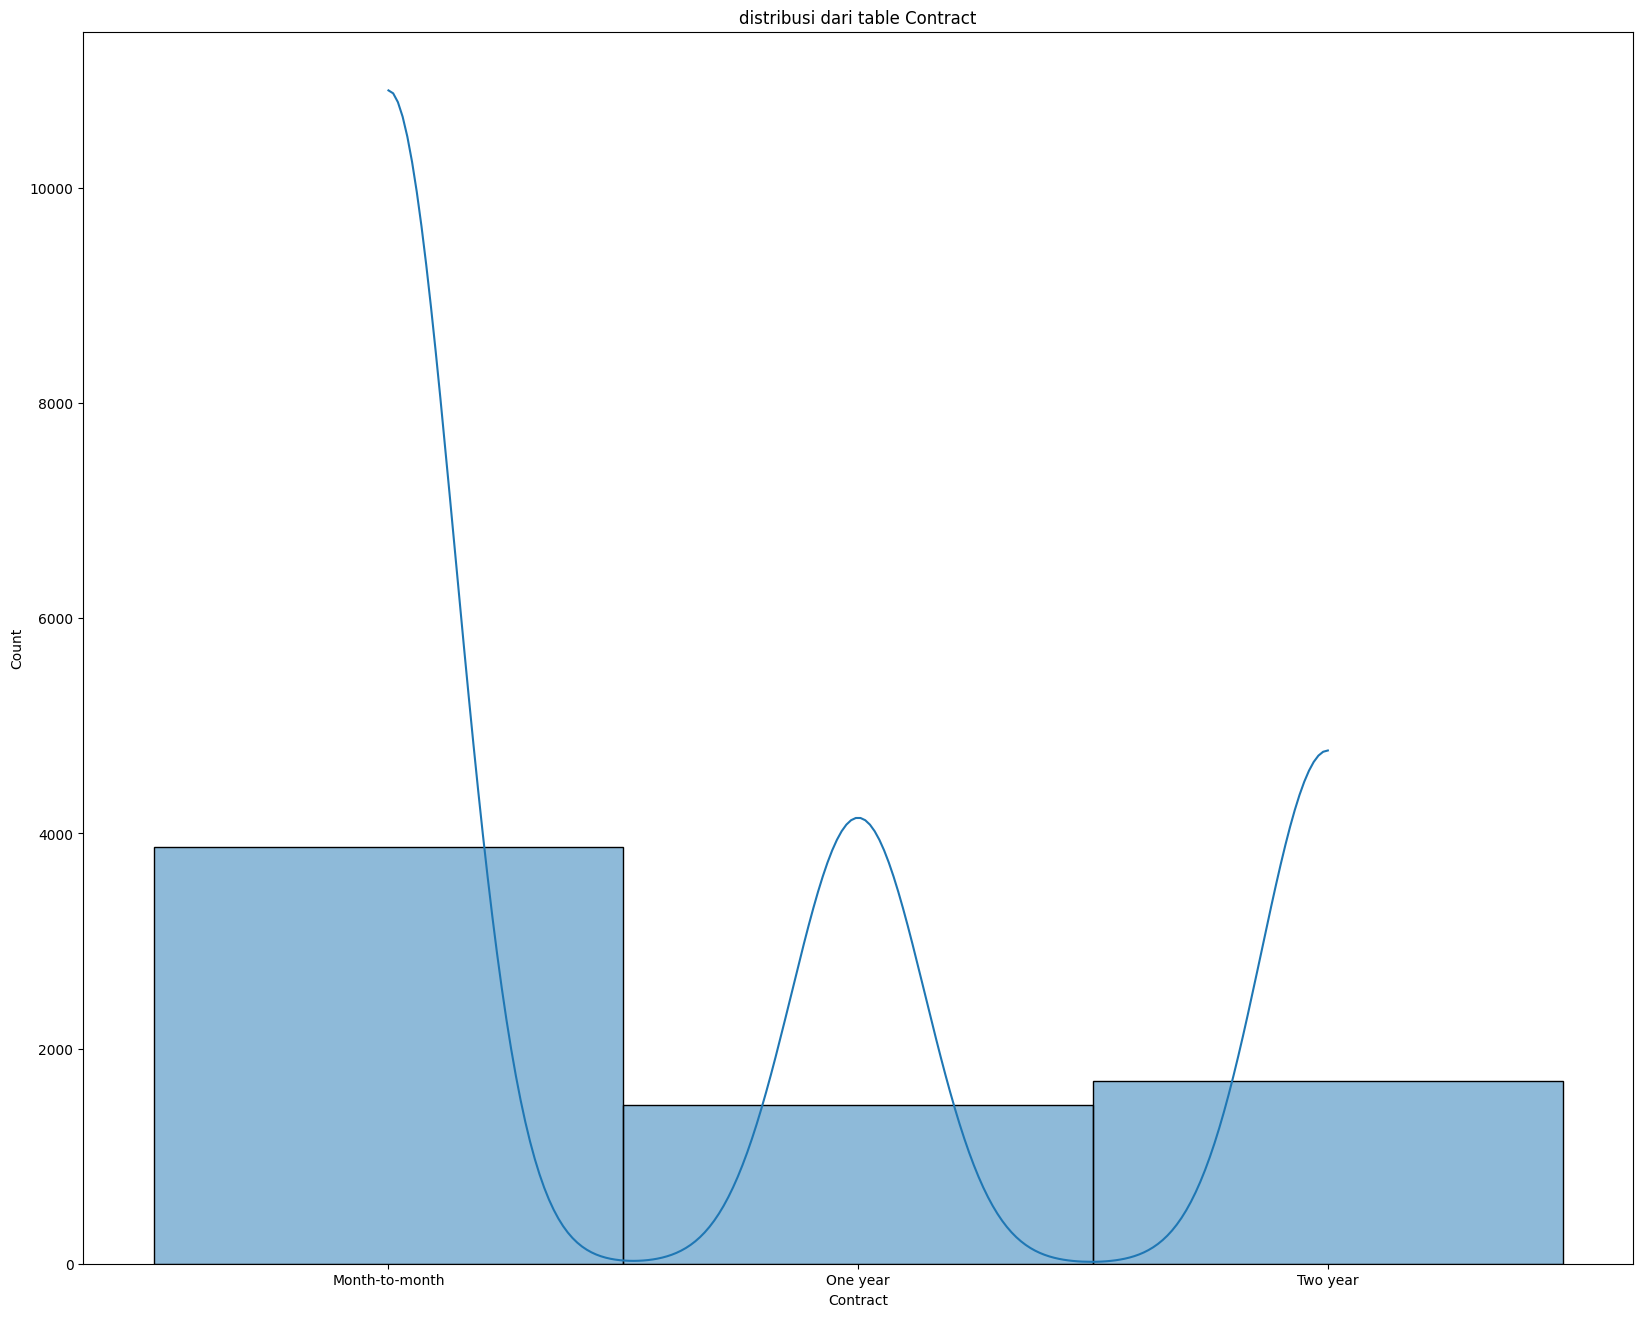

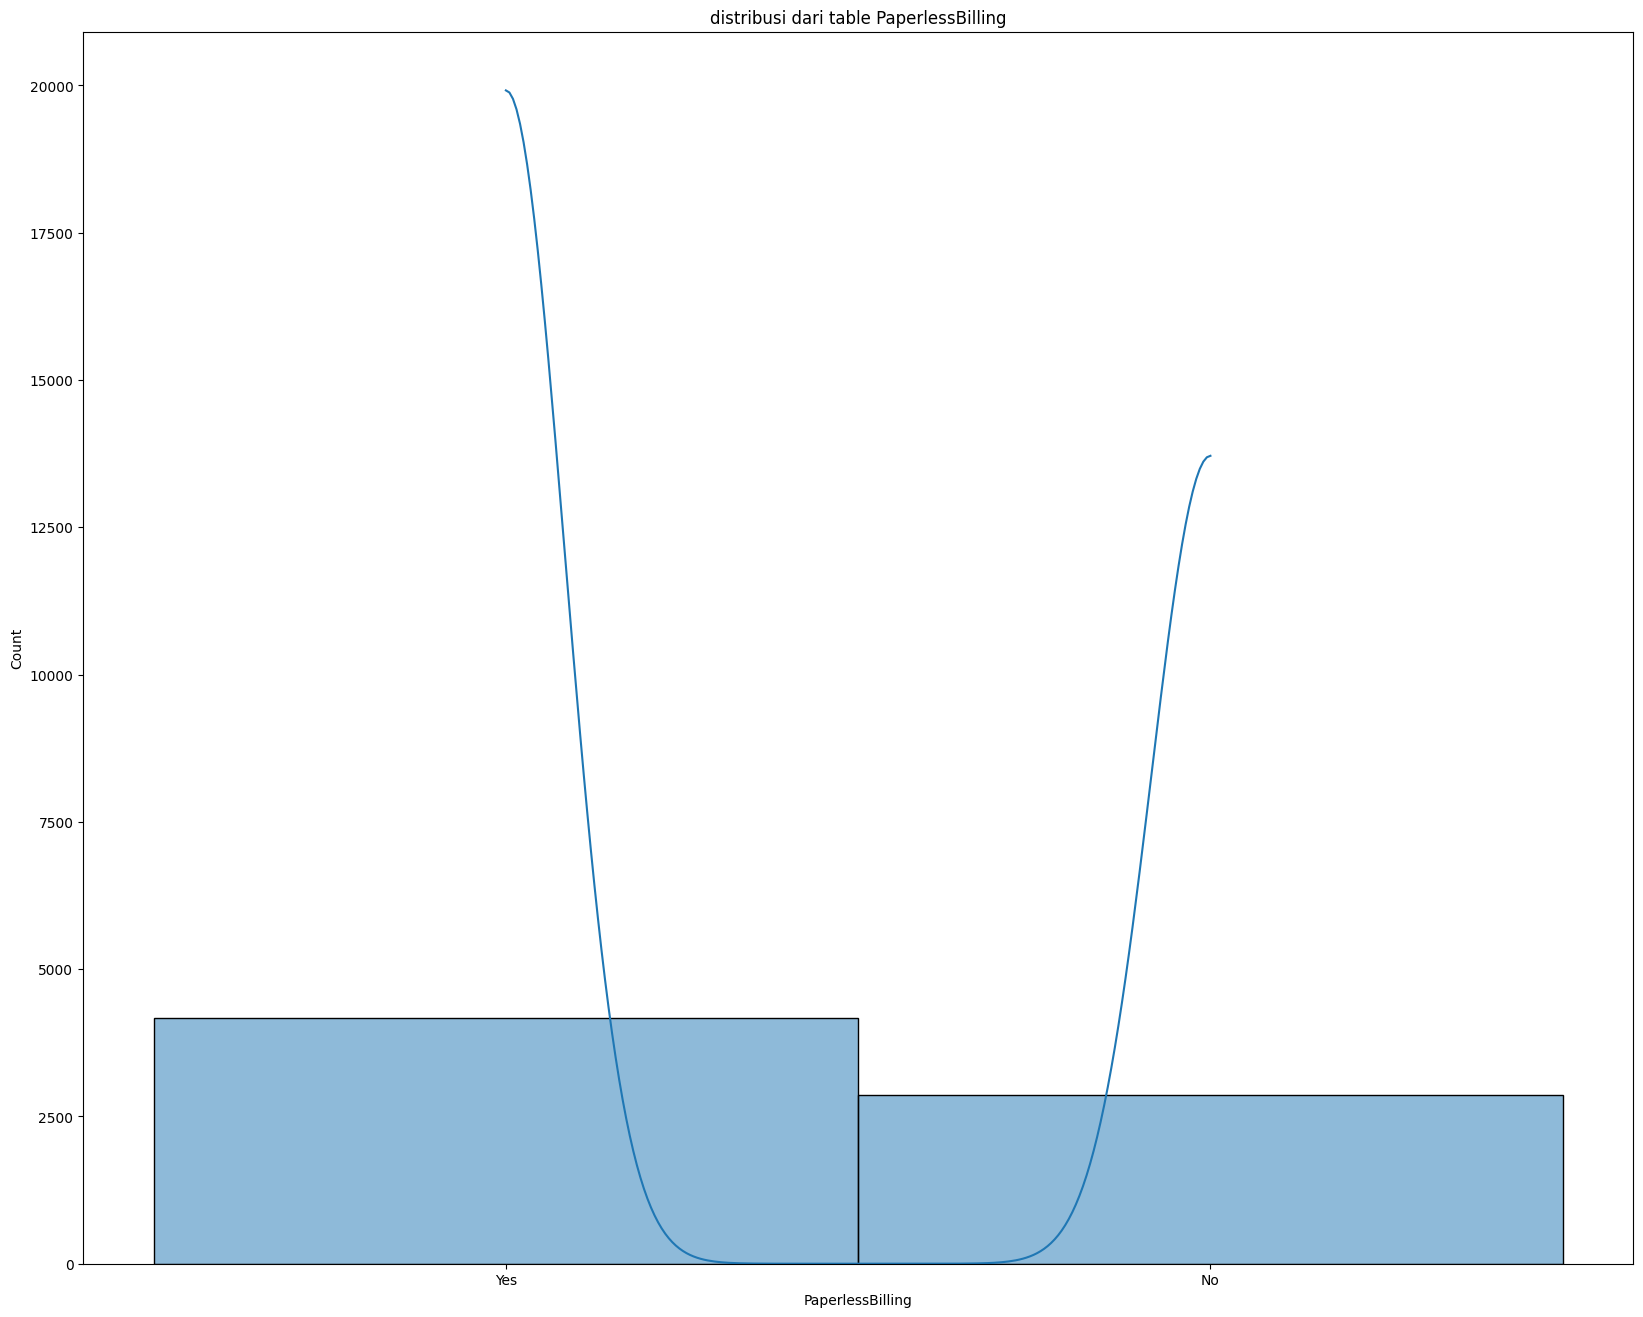

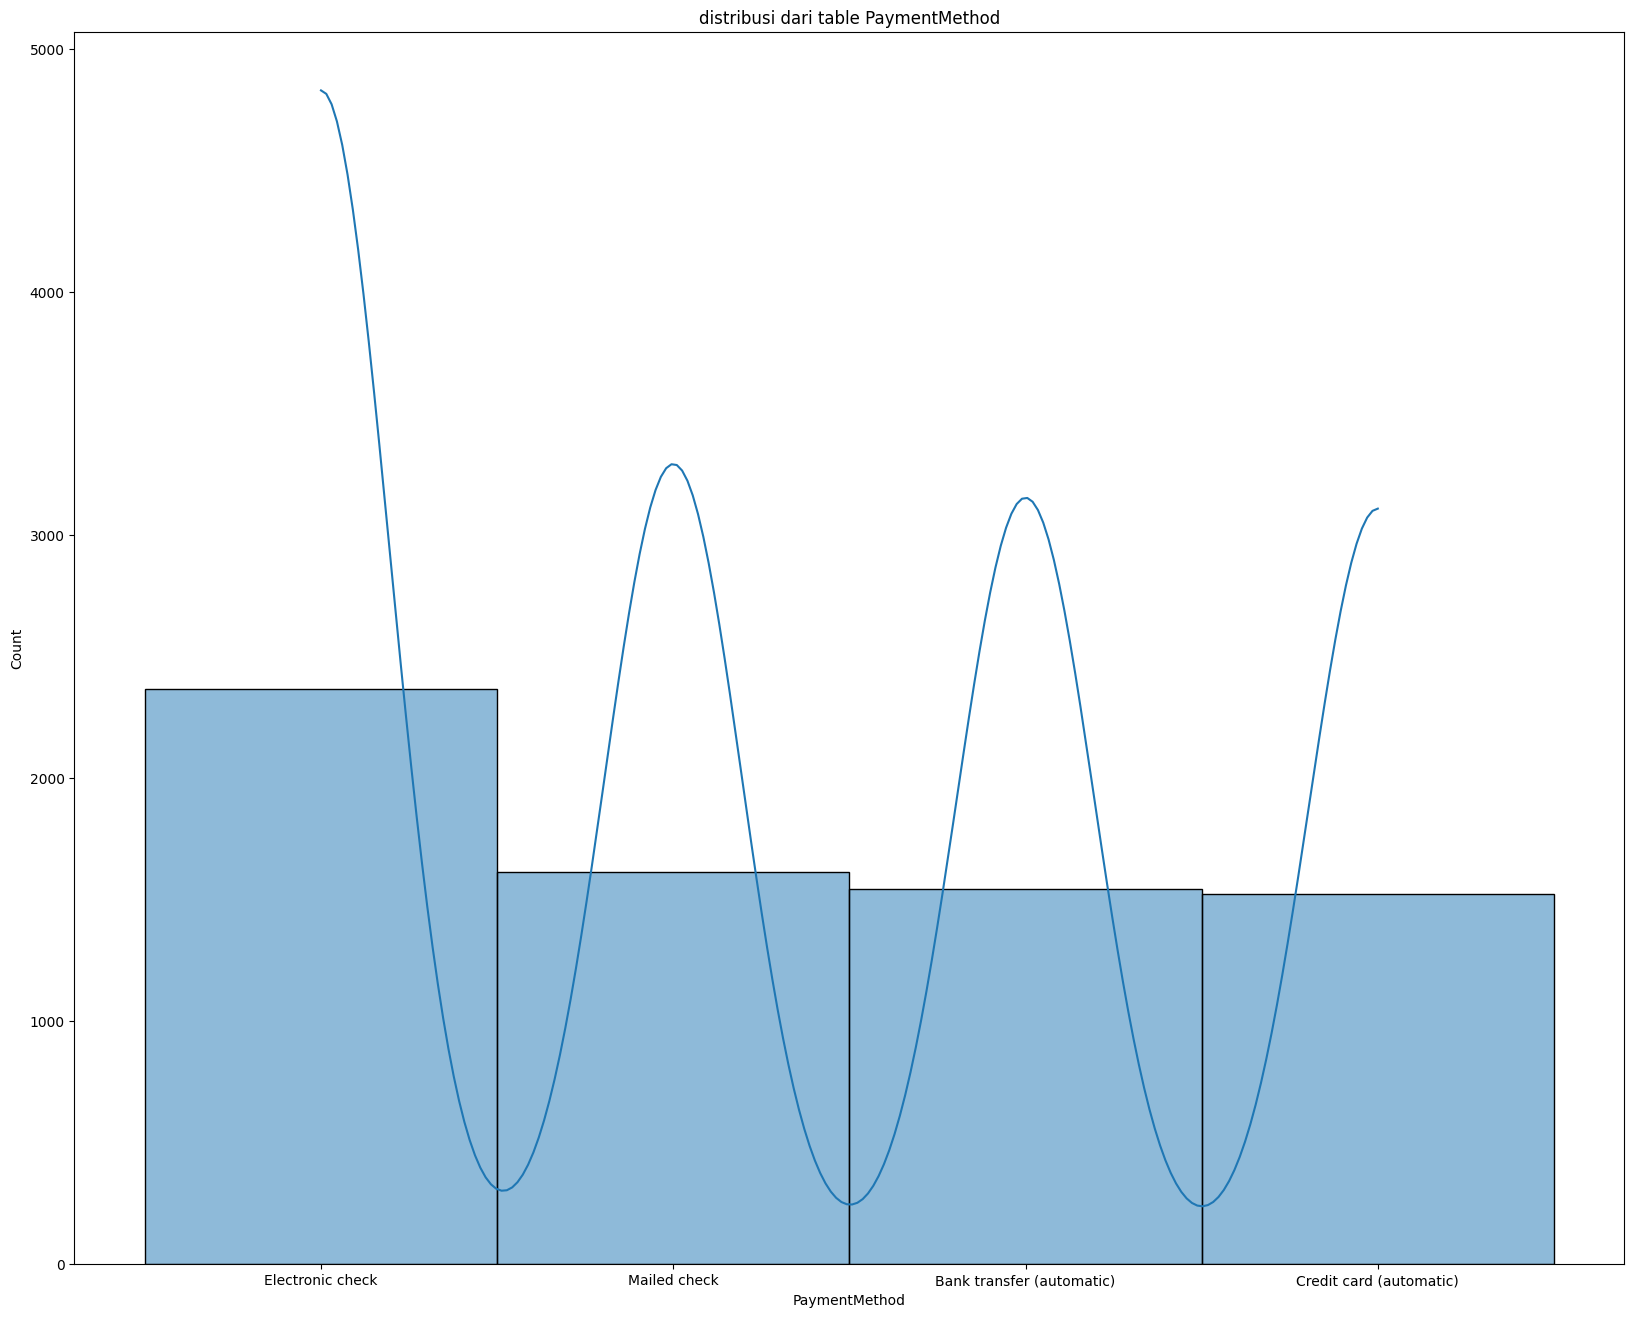

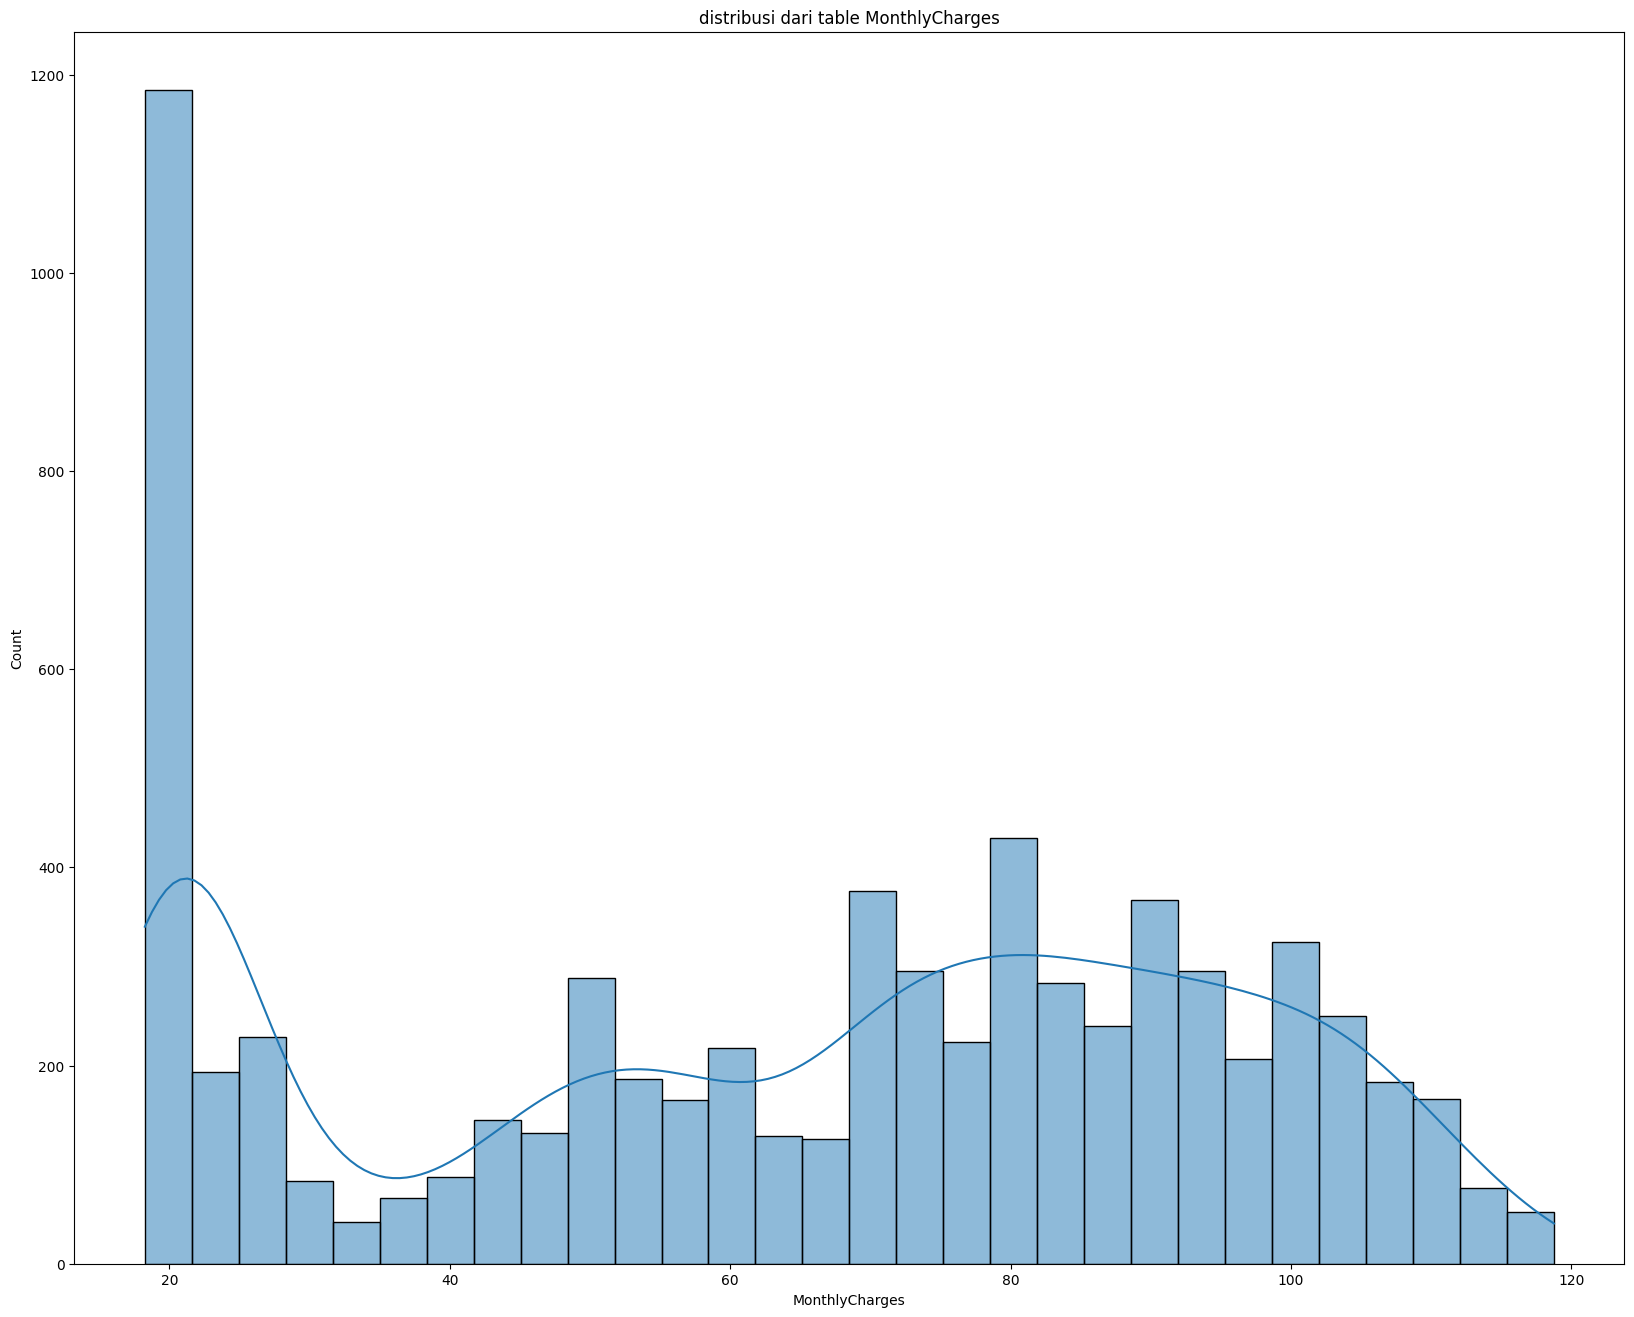

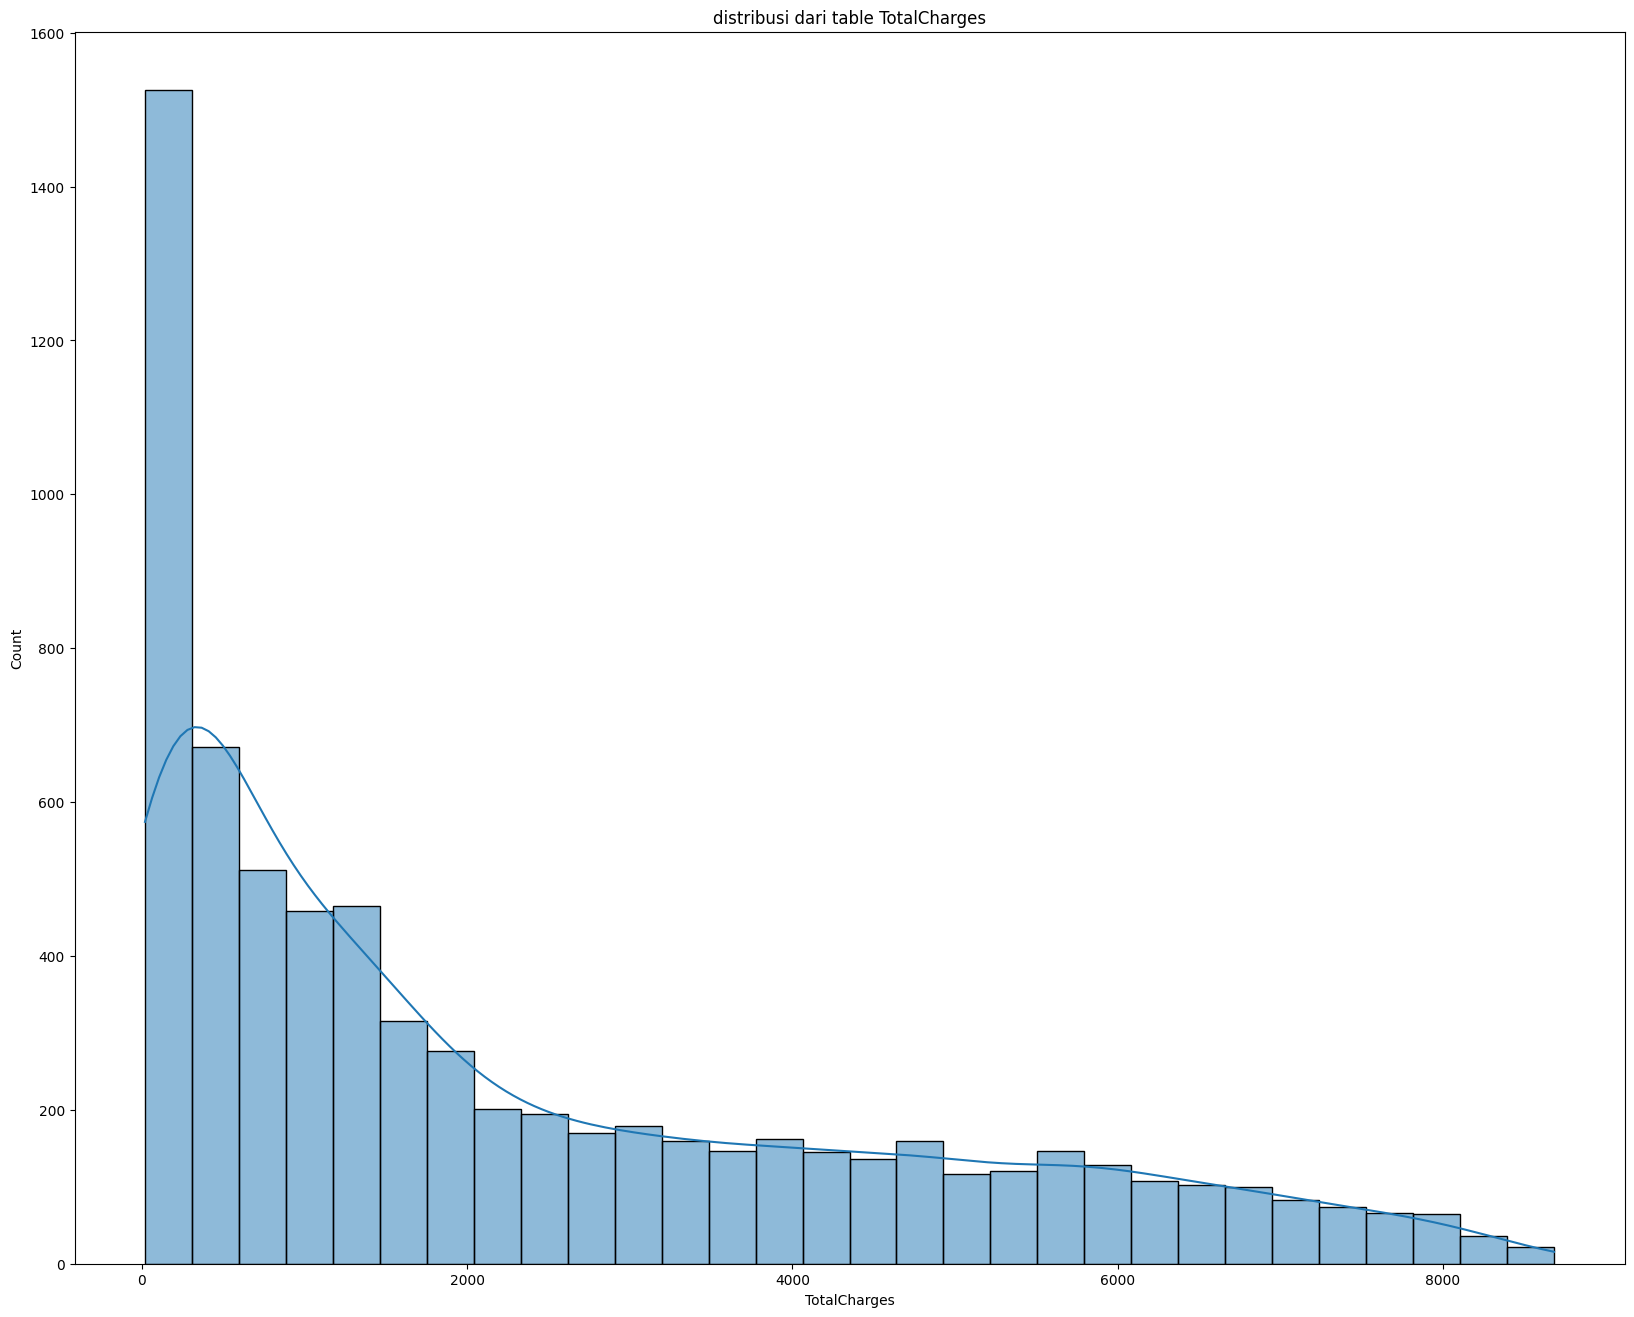

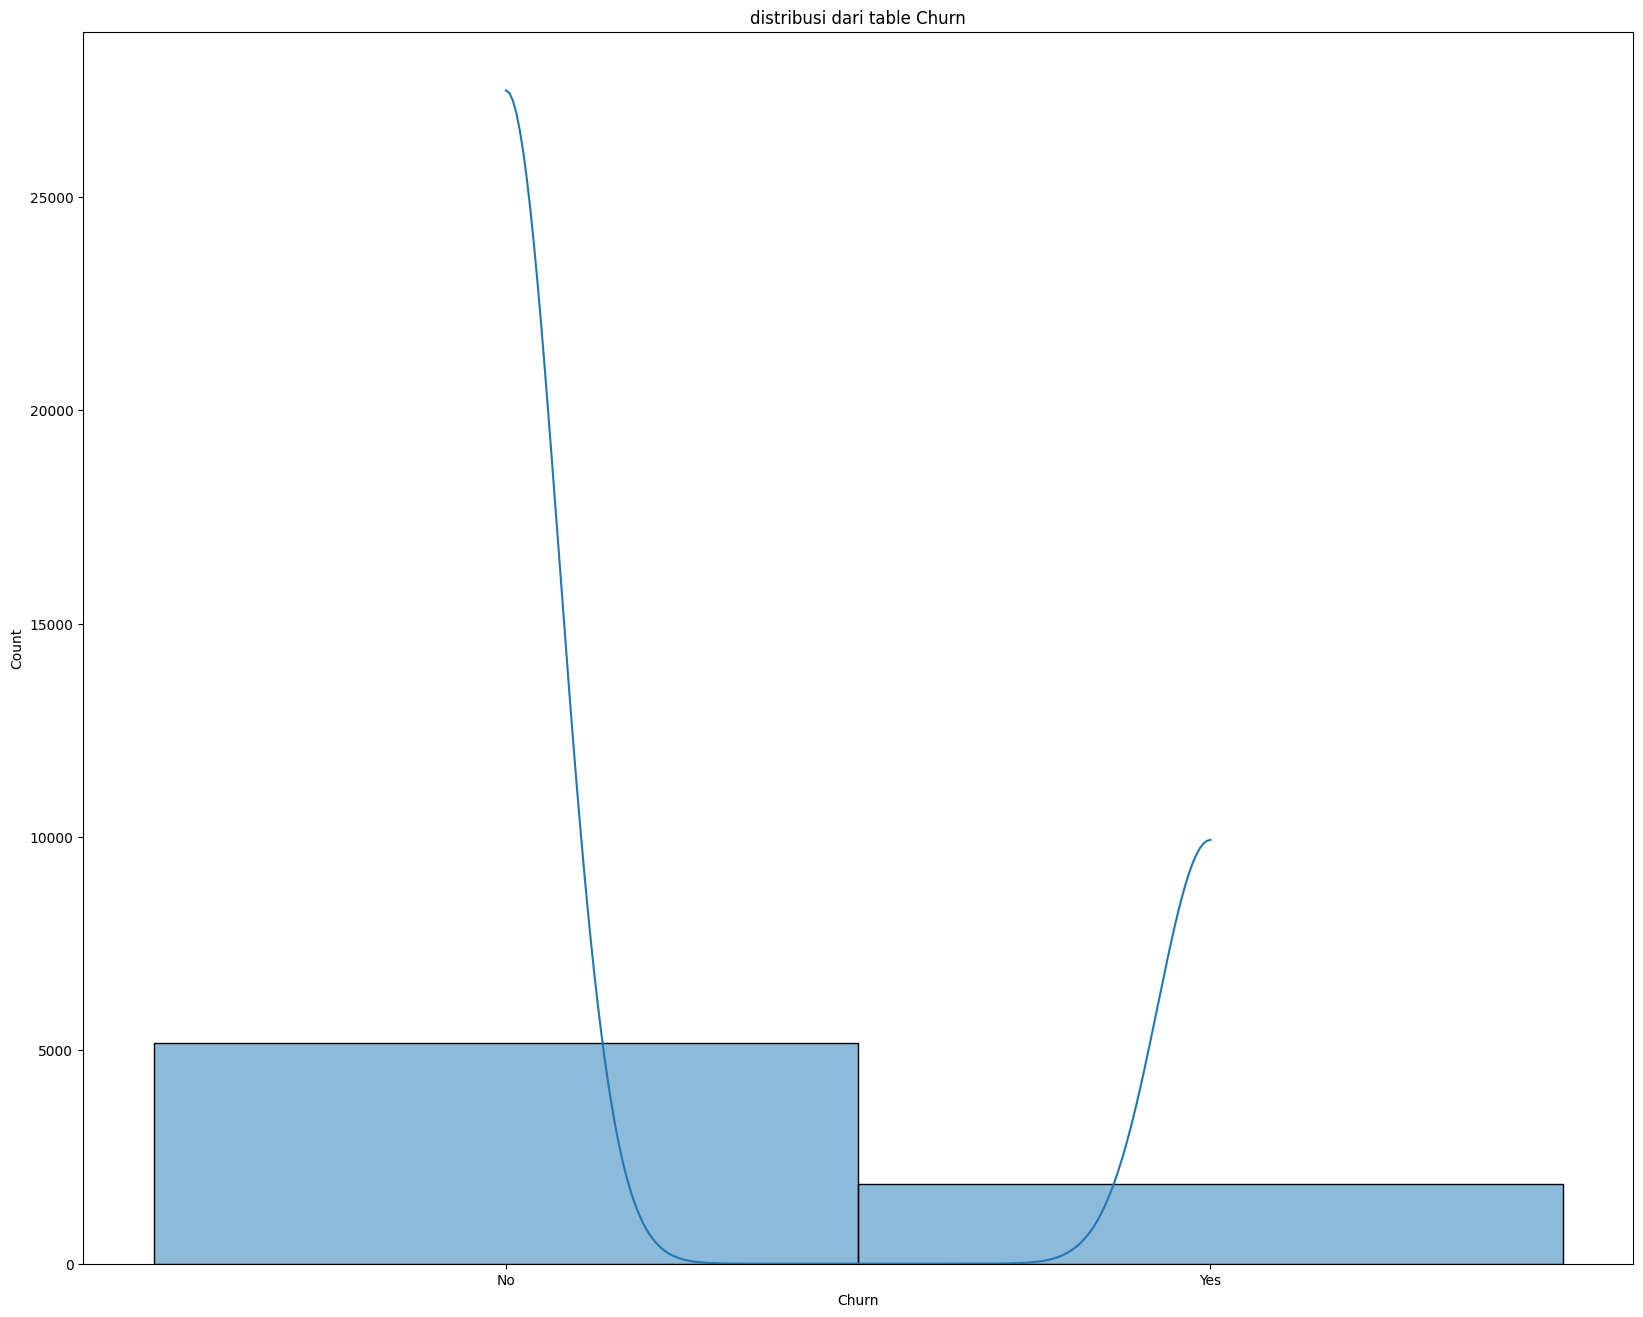

In [305]:
for c in df.columns:
  plt.figure(figsize=(20,16))
  sns.histplot(df[c], kde=True, bins=30)
  plt.title(f'distribusi dari table {c}')
  plt.show()

In [306]:
df_num = ['tenure','MonthlyCharges','TotalCharges']

In [307]:
for c in df_num:
  Q1 = df[c].quantile(0.25)
  Q3 = df[c].quantile(0.75)

  IQR = Q3 - Q1

  lower = Q1 - 1.5 * IQR
  upper = Q3 + 1.5 * IQR

  outlier = df[(df[c] < lower) | (df[c] > upper)]
  print(f'{c} : {outlier.shape[0]} outlier ')

tenure : 0 outlier 
MonthlyCharges : 0 outlier 
TotalCharges : 0 outlier 


## Data Preprocessing

In [308]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [310]:
for colom in df.columns:
  print(f'unique value dari kolom:{colom} = {df[colom].unique()}')

unique value dari kolom:customerID = ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
unique value dari kolom:gender = ['Female' 'Male']
unique value dari kolom:SeniorCitizen = [0 1]
unique value dari kolom:Partner = ['Yes' 'No']
unique value dari kolom:Dependents = ['No' 'Yes']
unique value dari kolom:tenure = [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
unique value dari kolom:PhoneService = ['No' 'Yes']
unique value dari kolom:MultipleLines = ['No phone service' 'No' 'Yes']
unique value dari kolom:InternetService = ['DSL' 'Fiber optic' 'No']
unique value dari kolom:OnlineSecurity = ['No' 'Yes' 'No internet service']
unique value dari kolom:OnlineBackup = ['Yes' 'No' 'No internet service']
unique value dari kolom:DeviceProtection = ['No' 'Yes' 'No internet service']
unique

In [311]:
from sklearn.preprocessing import LabelEncoder

binary_cols = [
    'Partner',
    'Dependents',
    'PhoneService',
    'PaperlessBilling',
    'Churn'
]

for col in binary_cols:
    df[col] = df[col].map({'No': 0, 'Yes': 1}).astype(int)

In [312]:
df['gender'] = df['gender'].map({'Male':0,'Female':1}).astype(int)

In [313]:
tigas_col = [
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies'
]

for col in tigas_col:
  df[col] = df[col].map({
      'No internet service' : 0,
      'No' : 1,
      'Yes' : 2
  }).astype(int)

In [314]:
df['MultipleLines'] = df['MultipleLines'].map({
    'No phone service' : 0,
    'No' : 1,
    'Yes':2
}).astype(int)

In [315]:
cat_colom = df.select_dtypes(include=['object']).columns

for c in cat_colom:
  Le = LabelEncoder()
  df[c] = Le.fit_transform(df[c])

In [316]:
for colom in df.columns:
  print(f'unique value dari kolom:{colom} = {df[colom].unique()}')

unique value dari kolom:customerID = [5375 3962 2564 ... 3367 5934 2226]
unique value dari kolom:gender = [1 0]
unique value dari kolom:SeniorCitizen = [0 1]
unique value dari kolom:Partner = [1 0]
unique value dari kolom:Dependents = [0 1]
unique value dari kolom:tenure = [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
unique value dari kolom:PhoneService = [0 1]
unique value dari kolom:MultipleLines = [0 1 2]
unique value dari kolom:InternetService = [0 1 2]
unique value dari kolom:OnlineSecurity = [1 2 0]
unique value dari kolom:OnlineBackup = [2 1 0]
unique value dari kolom:DeviceProtection = [1 2 0]
unique value dari kolom:TechSupport = [1 2 0]
unique value dari kolom:StreamingTV = [1 2 0]
unique value dari kolom:StreamingMovies = [1 2 0]
unique value dari kolom:Contract = [0 1 2]
unique value dari kolom:Pap

In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int64  
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


In [318]:
X = df.drop('Churn', axis=1)
y = df['Churn']

### melihat korelasi dengan Target (Y)

<Axes: >

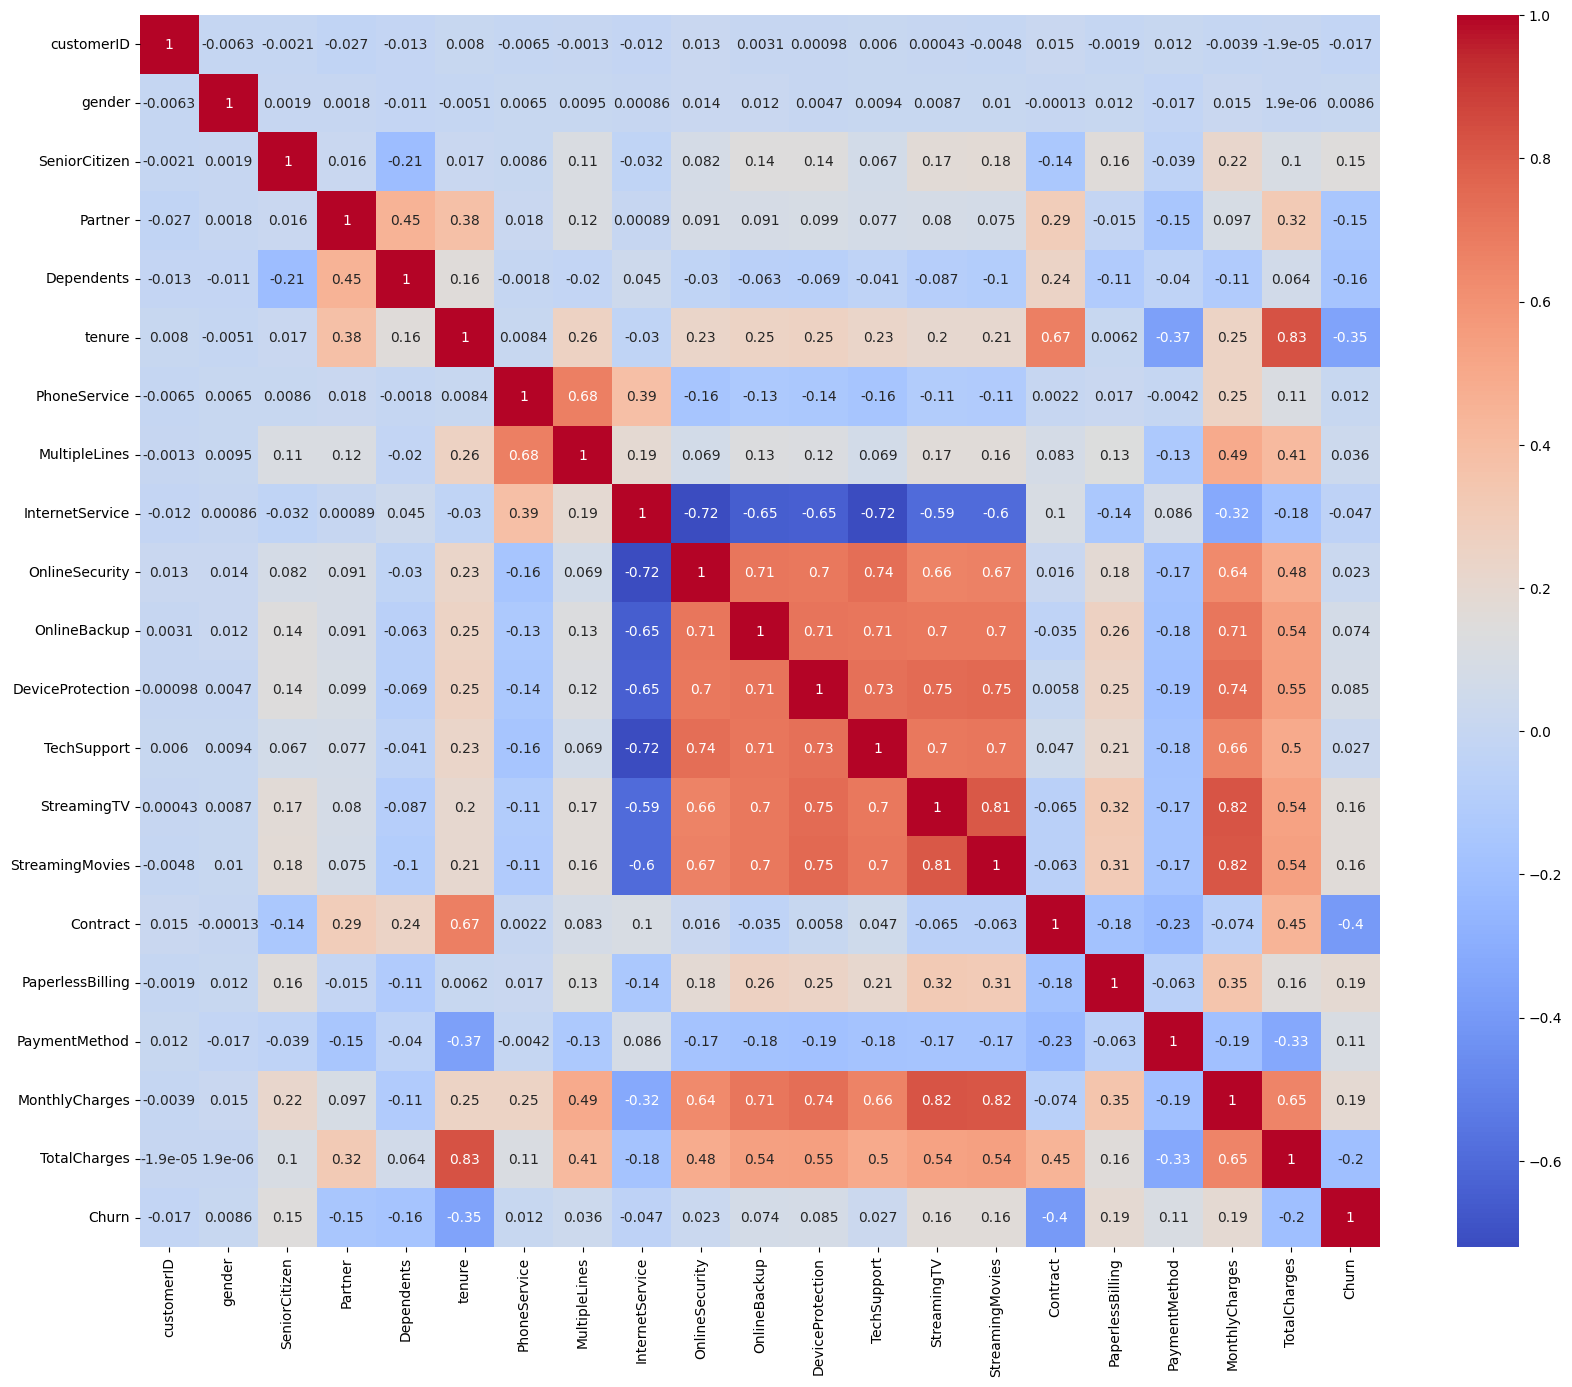

In [319]:
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(), annot=True,cmap='coolwarm')

## Pemrosesan Data dan Feature Engineering

### Split Dataset

In [320]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### melihat multikorelasi dengan VIF

In [321]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [322]:
df_vif_train = add_constant(X_train)
df_vif_test = add_constant(X_test)

In [323]:
df_vif_test

,const,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
185,1.0,692,1,0,1,0,1,0,0,0,...,1,1,1,1,1,0,1,2,24.80,24.80
2715,1.0,325,0,0,0,0,41,1,2,2,...,0,0,0,0,0,0,1,0,25.25,996.45
3825,1.0,2527,1,0,1,1,52,1,1,2,...,0,0,0,0,0,2,0,3,19.35,1031.70
1807,1.0,4911,1,0,0,0,1,1,1,1,...,1,2,1,1,1,0,0,2,76.35,76.35
132,1.0,6058,0,0,0,0,67,1,1,0,...,1,1,2,1,1,2,0,0,50.55,3260.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6366,1.0,1967,1,0,1,0,64,1,1,0,...,2,2,2,1,2,2,1,3,68.30,4378.80
315,1.0,3548,0,0,1,1,51,1,2,1,...,2,1,2,2,2,1,0,1,110.05,5686.40
2439,1.0,6282,0,0,1,1,17,1,1,2,...,0,0,0,0,0,1,0,0,19.90,329.75
5002,1.0,384,1,0,1,1,69,0,0,0,...,1,2,1,1,2,2,1,1,43.95,2960.10


In [324]:
def hitung_vif(df):
  vif = pd.DataFrame()
  vif['Fitur'] = df.columns

  vif['score'] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
  return vif

hasil = hitung_vif(df_vif_train)
hasil2 = hitung_vif(df_vif_test)
print(hasil)

               Fitur       score
0              const  145.638989
1         customerID    1.004047
2             gender    1.002569
3      SeniorCitizen    1.146708
4            Partner    1.460096
5         Dependents    1.378566
6             tenure    7.275676
7       PhoneService    3.617988
8      MultipleLines    3.400035
9    InternetService   18.081021
10    OnlineSecurity    5.260561
11      OnlineBackup    5.409291
12  DeviceProtection    5.408957
13       TechSupport    5.251429
14       StreamingTV    9.599115
15   StreamingMovies    9.522950
16          Contract    2.446063
17  PaperlessBilling    1.206402
18     PaymentMethod    1.177040
19    MonthlyCharges   55.218347
20      TotalCharges   10.485173


In [325]:
print(hasil2)

               Fitur       score
0              const  158.202824
1         customerID    1.009755
2             gender    1.009643
3      SeniorCitizen    1.173525
4            Partner    1.497876
5         Dependents    1.414476
6             tenure    7.522617
7       PhoneService    3.509430
8      MultipleLines    3.292658
9    InternetService   19.120006
10    OnlineSecurity    5.678613
11      OnlineBackup    5.614401
12  DeviceProtection    5.678551
13       TechSupport    5.302323
14       StreamingTV    9.883825
15   StreamingMovies   10.305181
16          Contract    2.506933
17  PaperlessBilling    1.202595
18     PaymentMethod    1.249583
19    MonthlyCharges   57.965411
20      TotalCharges   10.286179


In [326]:
X_train = X_train.drop(['MonthlyCharges'],axis=1)
X_test = X_test.drop(['MonthlyCharges'],axis=1)
X_train = X_train.drop(['TotalCharges'],axis=1)
X_test = X_test.drop(['TotalCharges'],axis=1)

In [327]:
print(X_train.columns)
print(X_test.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod'],
      dtype='object')
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod'],
      dtype='object')


In [328]:
df_vif_baru_train = add_constant(X_train)
hasill = hitung_vif(df_vif_baru_train)
print(hasill)

               Fitur      score
0              const  35.639144
1         customerID   1.003916
2             gender   1.001935
3      SeniorCitizen   1.134337
4            Partner   1.459945
5         Dependents   1.373733
6             tenure   2.628965
7       PhoneService   2.293281
8      MultipleLines   2.402260
9    InternetService   3.487671
10    OnlineSecurity   3.105347
11      OnlineBackup   2.981914
12  DeviceProtection   3.356188
13       TechSupport   3.394410
14       StreamingTV   3.613728
15   StreamingMovies   3.695887
16          Contract   2.176607
17  PaperlessBilling   1.192581
18     PaymentMethod   1.169062


In [329]:
# X_train = X_train.drop('customerID',axis=1)
# X_test = X_test.drop('customerID',axis=1)

## Pemodelan

In [330]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [331]:

def pilih_model():
    print('1. Random Forest')
    print('2. XGBoost')
    pilih = input("Pilih model yang mau dilatih (1/2): ")

    if pilih == "1":
        model = RandomForestClassifier(random_state=42)
        param_grid = {
            'n_estimators': [50, 100, 200],
            'max_depth': [5, 10, None],
            'min_samples_split': [2, 5, 10]
        }
        model = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

    elif pilih == "2":
        model = XGBClassifier(random_state=42)
        param_grid = {
            'n_estimators': [50, 100, 200],
            'max_depth': [5, 10, 12],
            'learning_rate': [0.01, 0.1, 0.2]
        }
        model = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

    else:
        print("Pilihan tidak valid")
        return None

    return model


In [332]:
model1 = pilih_model()

1. Random Forest
2. XGBoost
Pilih model yang mau dilatih (1/2): 1


In [333]:
model1.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [334]:
print('best params', model1.best_params_)
print('best accuracy', model1.best_score_)

best params {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
best accuracy 0.7980097746102843


In [335]:
model1.score(X_test, y_test)

0.8105039034776437

In [336]:
model2 = pilih_model()

1. Random Forest
2. XGBoost
Pilih model yang mau dilatih (1/2): 2


In [337]:
model2.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [5, 10, 12],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [338]:
model2.score(X_test, y_test)

0.8005677785663591

In [339]:
print('best params', model2.best_params_)
print('best accuracy', model2.best_score_)

best params {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
best accuracy 0.7964143476527223


### Evaluation

In [340]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [341]:
# evaluasi model untuk randomforest

y_pred = model1.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy :", acc)
print("Precision:", prec)
print("Recall   :", rec)
print("F1-score :", f1)

Accuracy : 0.8105039034776437
Precision: 0.6827586206896552
Recall   : 0.5308310991957105
F1-score : 0.5972850678733032


In [342]:
# evaluasi model untuk XGBoost

y_preds = model2.predict(X_test)

acc2 = accuracy_score(y_test, y_preds)
prec2 = precision_score(y_test, y_preds)
rec2 = recall_score(y_test, y_preds)
f12 = f1_score(y_test, y_preds)

print("Accuracy :", acc2)
print("Precision:", prec2)
print("Recall   :", rec2)
print("F1-score :", f12)

Accuracy : 0.8005677785663591
Precision: 0.6483870967741936
Recall   : 0.5388739946380697
F1-score : 0.5885797950219619


# INSIGHT


1. ACCURACY (Akurasi)
   - Fungsi: Mengukur persentase prediksi yang benar (baik churn maupun tidak)
     dari total keseluruhan data.
   - Analisis: RF (0.8105) > XGB (0.8005).
   - Konteks: RF berhasil menebak dengan benar ~81% dari seluruh basis pelanggan.
     Namun, akurasi bisa menipu jika data tidak seimbang (imbalanced).

2. PRECISION (Presisi)
   - Fungsi: Mengukur tingkat keakuratan model saat menebak kelas positif (Churn).
     Rumus: TP / (TP + FP).
   - Analisis: RF (0.6827) > XGB (0.6483).
   - Konteks Bisnis: SANGAT PENTING. RF memiliki presisi lebih tinggi, artinya
     risiko "salah tuduh" (pelanggan setia dikira churn) lebih rendah.
     Ini menghemat budget marketing agar promo retensi tidak salah sasaran.

3. RECALL (Sensitivitas)
   - Fungsi: Mengukur seberapa banyak pelanggan yang BENAR-BENAR churn yang
     berhasil ditangkap oleh model. Rumus: TP / (TP + FN).
   - Analisis: RF (0.5308) < XGB (0.5388).
   - Konteks Bisnis: XGBoost sedikit lebih unggul dalam menjaring pelanggan yang
     akan pergi. Namun, keunggulan ini sangat kecil (0.8%) dibanding penurunan
     presisi yang dialami XGBoost.

4. F1-SCORE
   - Fungsi: Rata-rata harmonik antara Precision dan Recall. Memberikan gambaran
     keseimbangan performa model, terutama jika data churn cenderung sedikit.
   - Analisis: RF (0.5972) > XGB (0.5885).
   - Konteks Bisnis: Karena F1-Score RF lebih tinggi, secara statistik RF adalah
     model yang paling stabil dan seimbang untuk digunakan dalam jangka panjang.



KESIMPULAN FINAL:
RF lebih baik dari XGBoost.